<a href="https://colab.research.google.com/github/ericasrafael/churn_model/blob/main/churn_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Você conhece o índice de Churn ?***
O índice de Churn ou Churn rate, é uma métrica utilizada por empresas para calcular a taxa de cancelamento ou desistência de clientes em um determinado período. Portanto, quanto menor o churn, melhor.

O resultado desse cálculo interfere diretamente na receita do negócio e, por isso, deve ser levado a sério pelos gestores.

O cálculo da taxa de churn rate é feito a partir da divisão entre os clientes que interromperam o serviço no fim do período pré-determinado pelo número de clientes no início desse mesmo período, multiplicada por 100, a fim de obtermos a taxa em formato de porcentagem.

De forma prática, seria algo assim: suponhamos que a sua empresa tenha 1000 clientes no início de um mês. Ao fim desse mesmo mês — ou outro período de análise pré-determinado — , o número de clientes cai para 950.

Utilizando esses dados, o cálculo do seu churn rate seria: 

50 (número de clientes que interromperam o serviço) / 1000 (clientes no início do processo) x 100 = 5%

Assim, nesse exemplo, a taxa de churn rate é de 5%.  Ou seja, 5% dos clientes daquele mês deixaram de manter parceria com a sua empresa.

A pesquisa** Brazil SaaS Landscape **mostrou que, entre as startups respondentes, a média de churn fica entre 4 e 5% ao mês. Para muitas empresas, entretanto, essa é uma taxa elevada e insustentável. 

O ideal é manter a taxa mais próxima possível de 0, pensando nas particularidades de seu negócio. 

Um cliente tem inúmeras razões para abandonar uma empresa, muitas das quais você pode nem imaginar à primeira vista. Por isso, essas causas devem ser estudadas e nunca ignoradas. Virar os olhos aqui é o mesmo que um escritor que ignora críticas no seu trabalho: uma receita para a perda de interesse do público.

* Se o cliente não consegue ver valor no seu produto ou serviço, você falhou com ele. Muitas vezes, isso acontece porque a empresa não prestou um suporte qualificado ou até mesmo prometeu algo que não poderia cumprir.
* O churn também acontece quando o produto ou serviço não acompanha as tendências do mercado e perde em qualidade. Problemas de desempenho, falta de atualização da solução, processos engessados, infraestrutura ruim e problemas de agilidade são alguns dos fatores que afetam a experiência do cliente e fazem com que ele procure por outra solução.
* Em alguns casos, o churn acontece porque o cliente precisa de algo que a empresa não pode oferecer no momento — como uma nova feature em um sistema, por exemplo. Em outros, simplesmente não há mais dinheiro para pagar pelo seu produto. Ainda, há os casos em que seu produto simplesmente deixa de ser o que ele procura naquele momento.
* Na maioria das vezes o churn pode ser evitado pela própria empresa. No entanto, existem aquelas situações que fogem ao nosso controle, como quando um cliente declara falência, por exemplo.

Alguns dos impactos negativos de uma taxa churn rate elevada são: 

* Dificuldade de firmar parcerias e contratos de expansão do negócio
* Baixa escalabilidade do produto ou do serviço
* Imagem externa da empresa desgastada
* Colaboradores desmotivados. 

#### Sobre as features e a target :
* RowNumber	: numero da linha (index + 1)
* CustomerId	: identidicação do cliente
* Surname	: sobrenome do cliente
* CreditScore	: escoragem de crédito ( quanto maior, melhor pagador)
* Geography	: país
* Gender	: sexo do cliente
* Age	: idade do cliente
* Tenure	: indicativo de estabilidade no emprego(quanto maior, maior a estabilidade)
* Balance	: quanto tem na conta do banco ( inflada de zeros )
* NumOfProducts	: número de produtos adquiridos
* HasCrCard	: se tem cartão de credito ativo
* IsActiveMember	: se é cliente com conta ativa
* EstimatedSalary	: salario estimado em dólar
* Exited : target ( se saiu ou não da cartela de clientes )

In [ ]:
!pip install sweetviz
!pip install imblearn  

In [ ]:
# imports

import pandas as pd # dados
import sweetviz as sv # vizualização
import missingno as missing
import numpy as np # algebra com dados
import matplotlib.pyplot as plt # grafico
import seaborn as sns # grafico

# pré-processamentos

from sklearn.preprocessing import LabelEncoder  # transforma categóricas em numéricas (1,2,3...) em uma mesma coluna
from sklearn.preprocessing import MinMaxScaler # padronização = valor-column.min/column.max-column.min


# MODELOS

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

# MÉTRICAS

from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix


# TUNAGEM DE MODELOS, COMBINAÇÕES DE MODELOS PARA MELHORAR PERFORMANCE

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

# EVITAR VARIAÇÕES DO MODELO DE ACORDO COM A AMOSTRA PARA TESTE

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold  # recomendável, visto que a target está desbalanceada
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, plot_importance

# DESBALANCEAMENTO DE DADOS

from imblearn.over_sampling import SMOTE  # gerar amostras sintéticas na classe minoritária a partir de amostras vizinhas 

ModuleNotFoundError: ignored

In [ ]:
# importando o dataset

url = '/content/drive/MyDrive/DRIVE PARA COLAB/Churn_Modelling.csv'
dados = pd.read_csv(url)
dados

# 10000 rows x 14 columns

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


                                             |          | [  0%]   00:00 -> (? left)


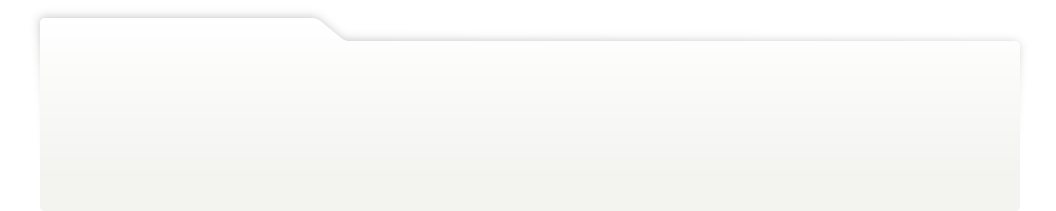
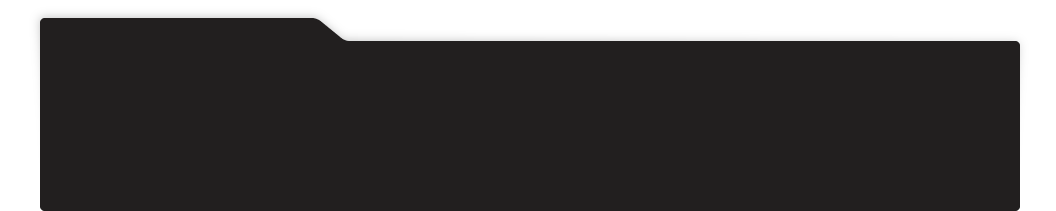
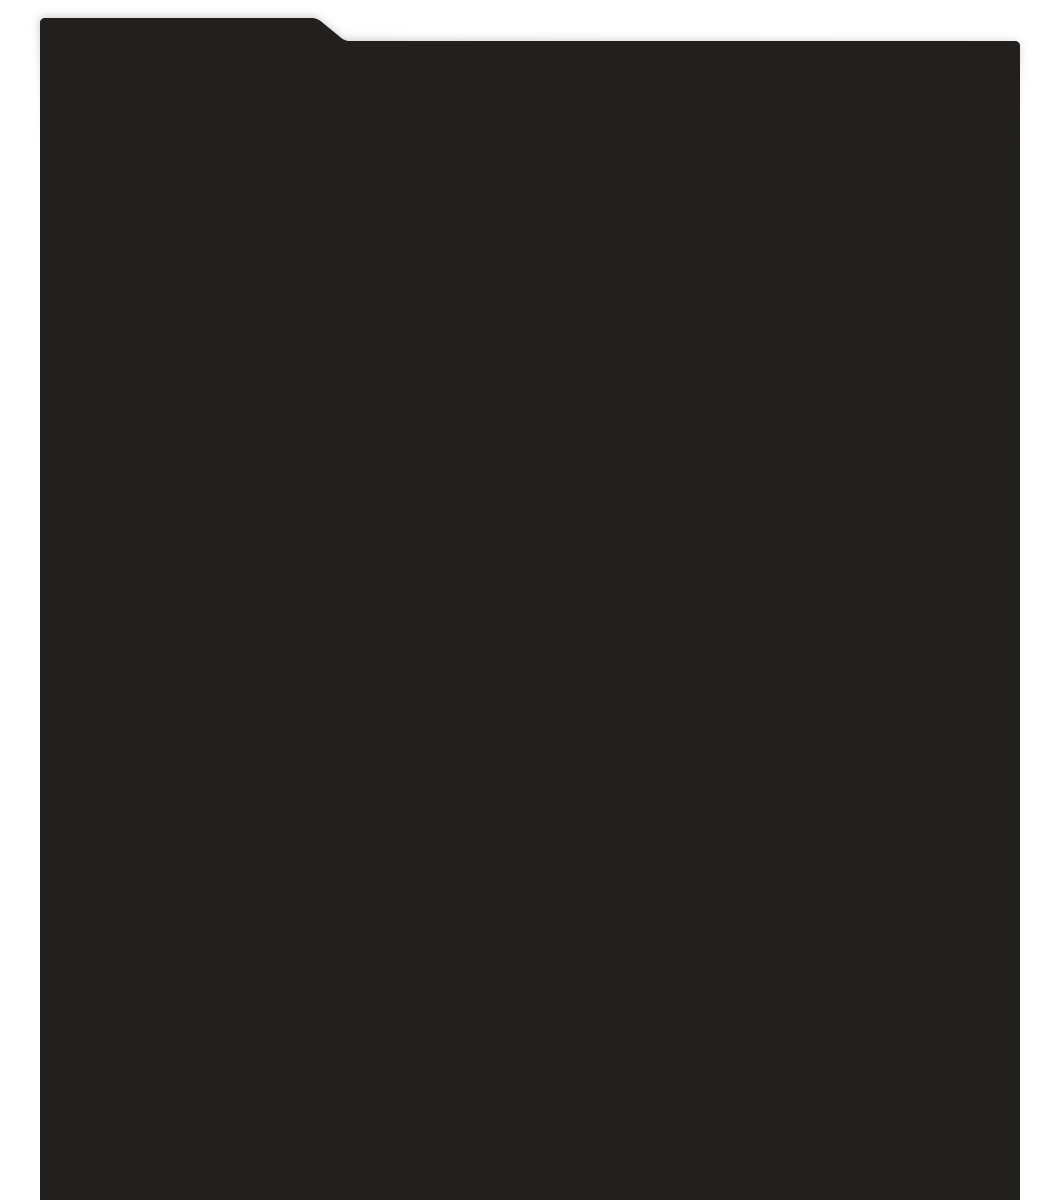
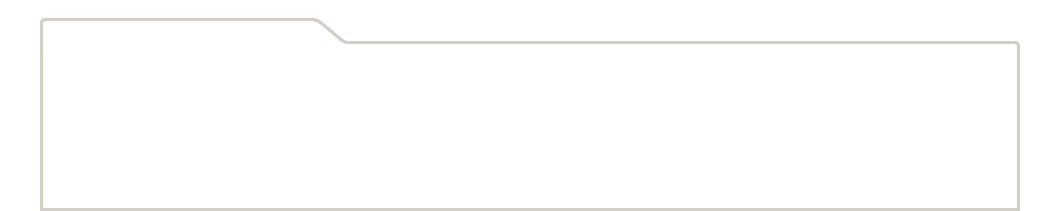
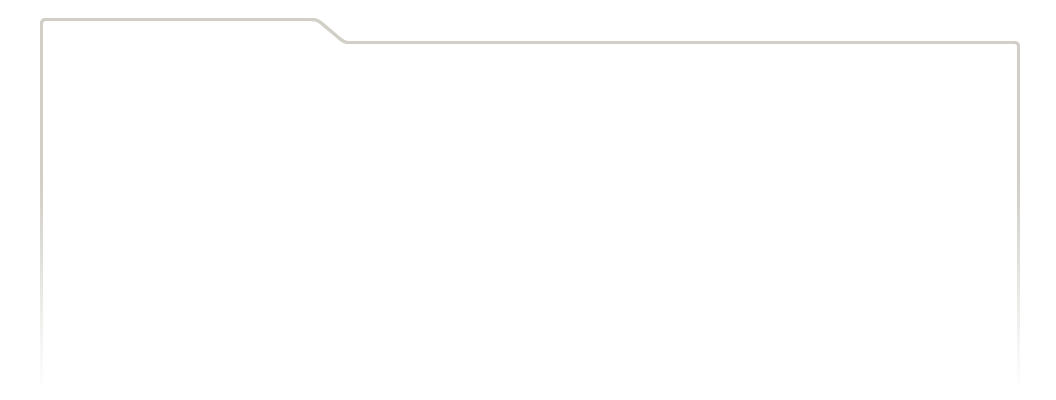
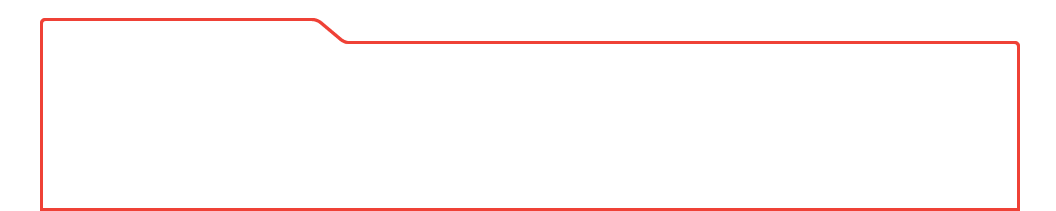
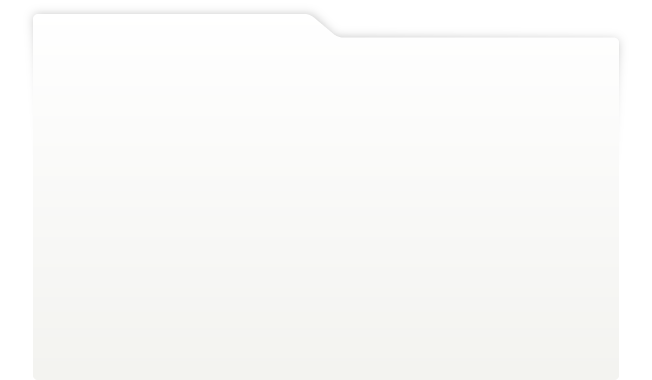
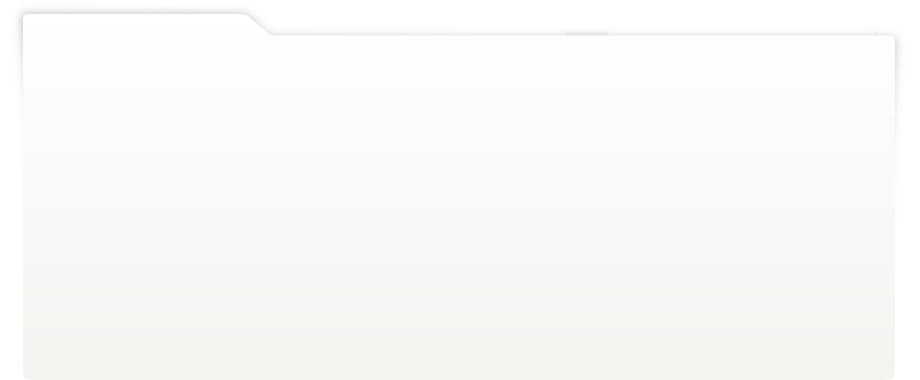
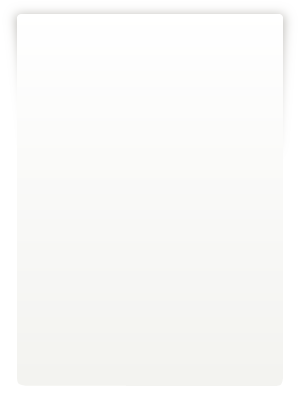
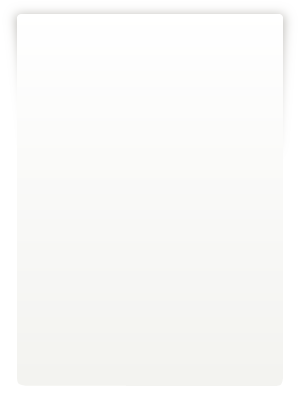
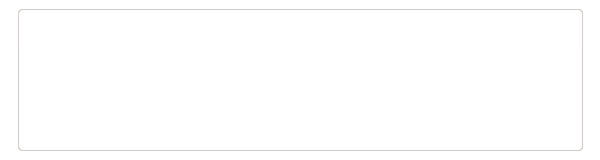
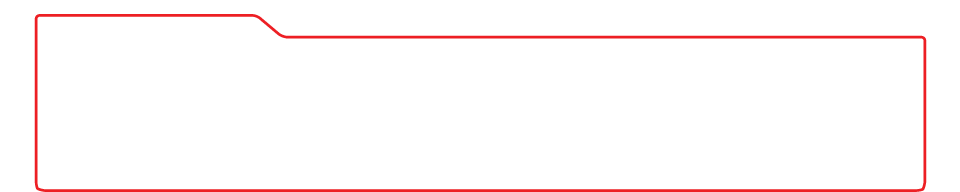
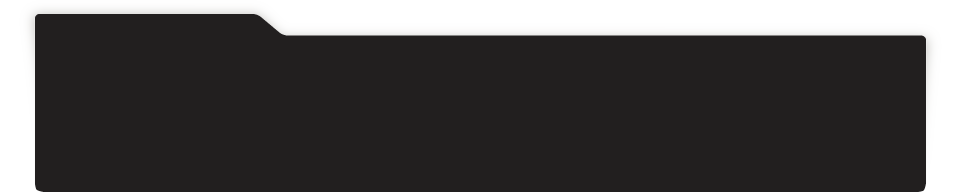
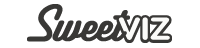
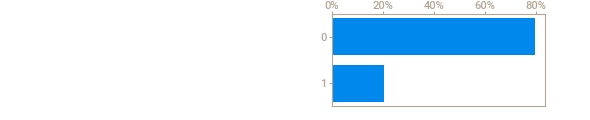
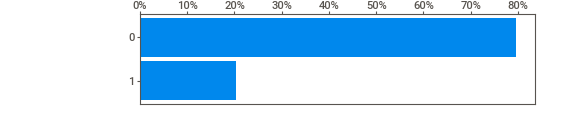
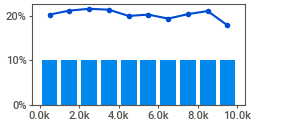
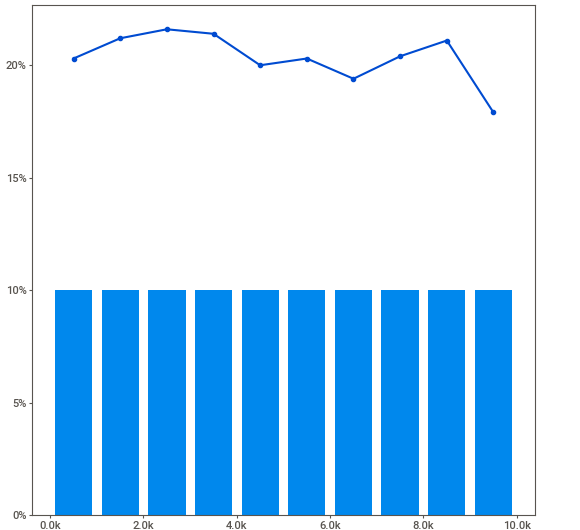
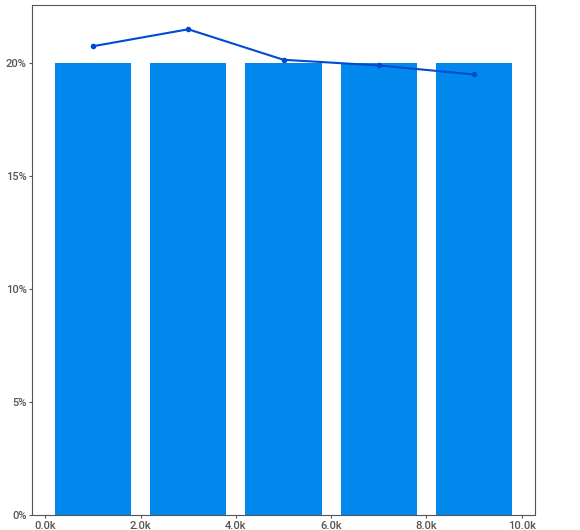
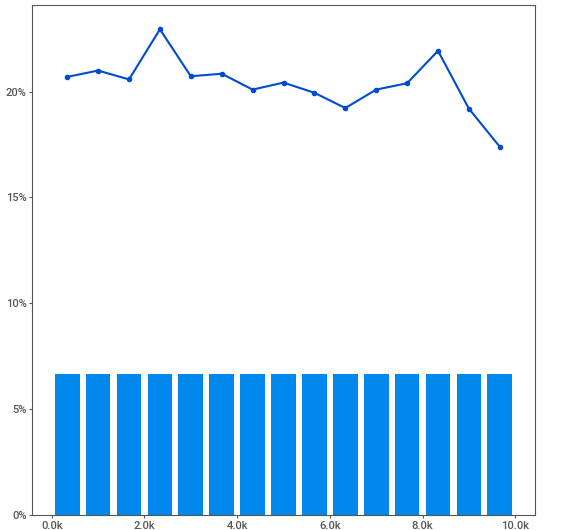
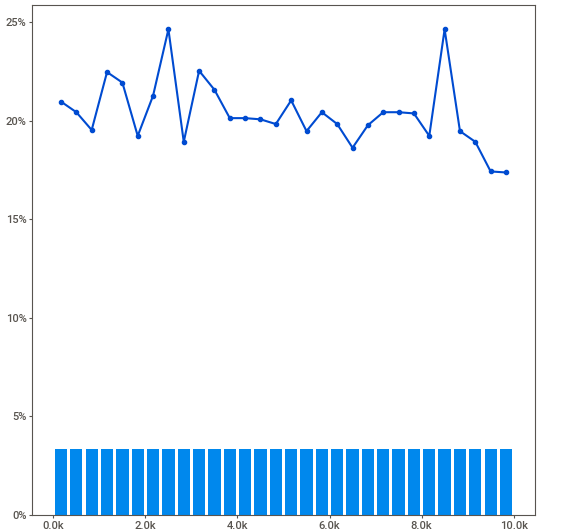
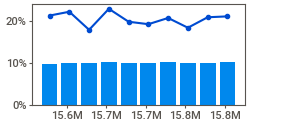
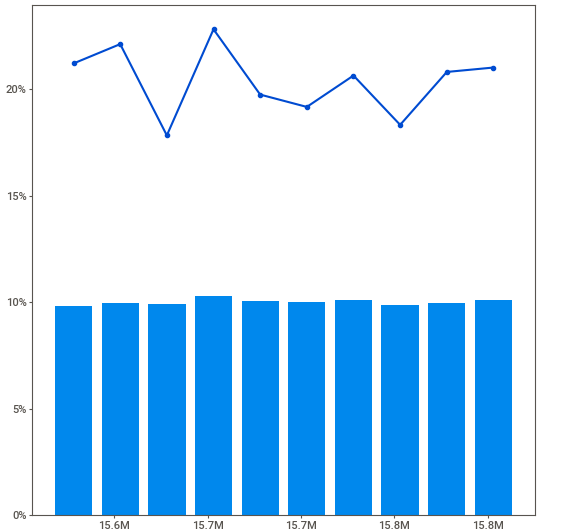
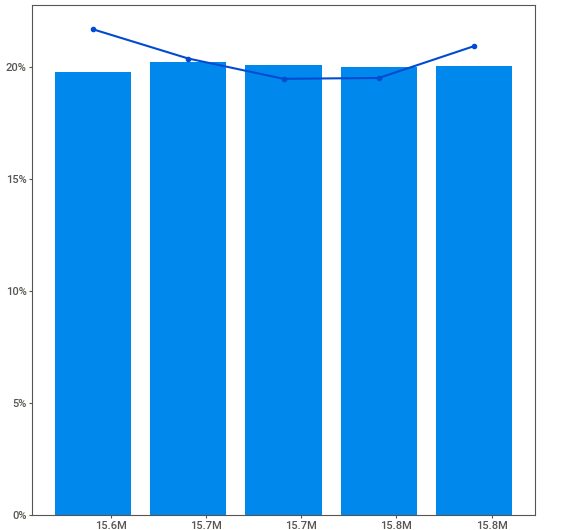
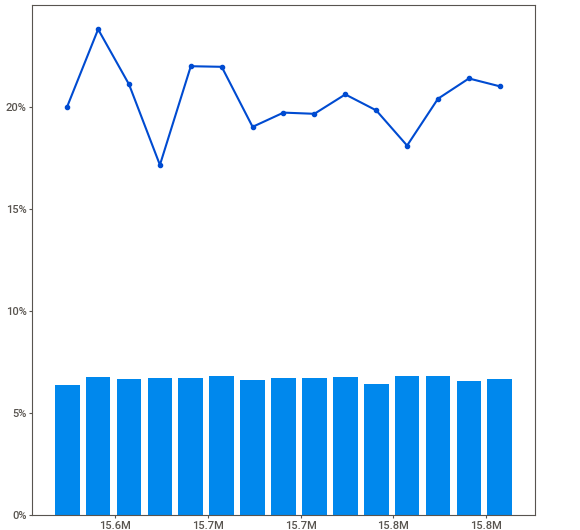
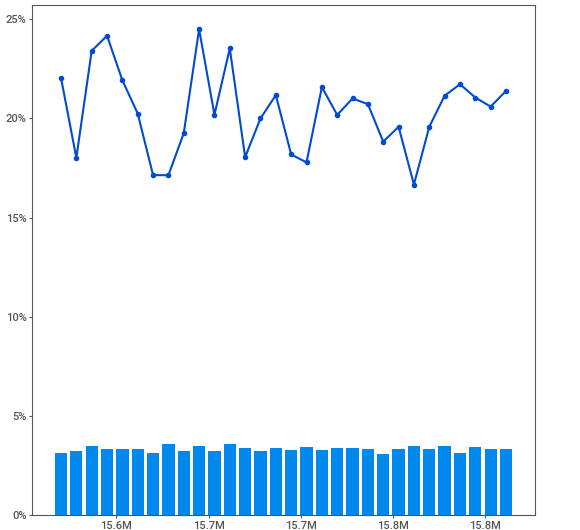
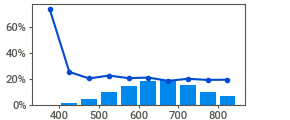
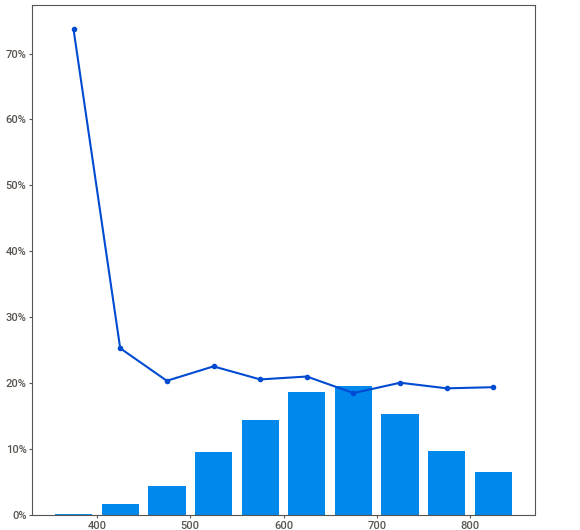
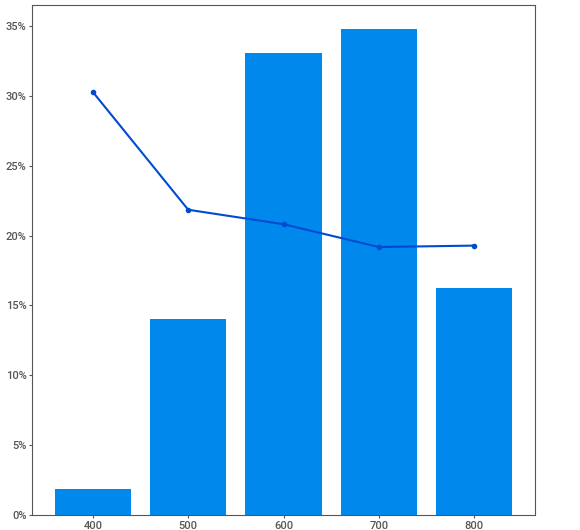
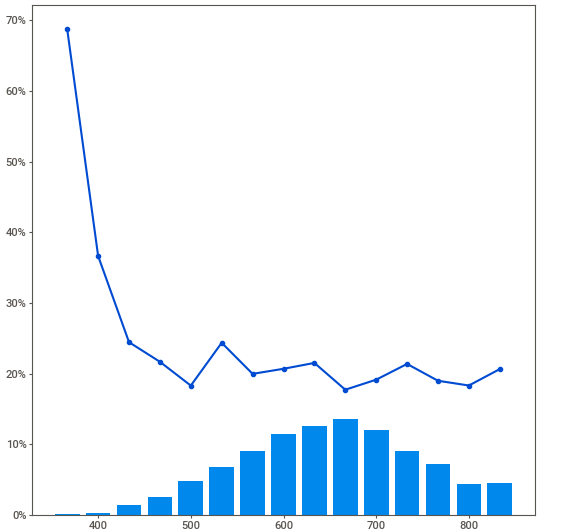
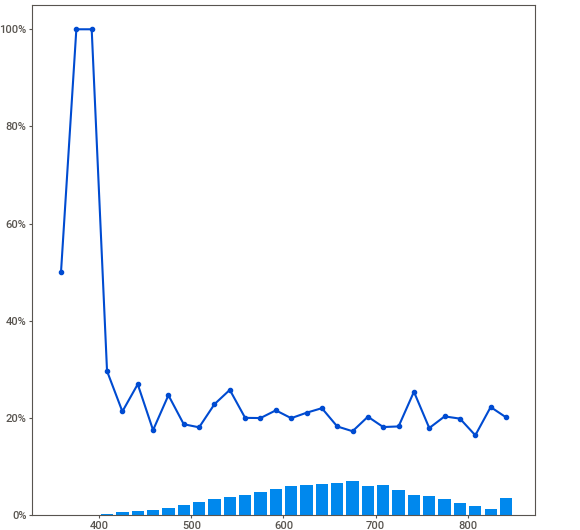
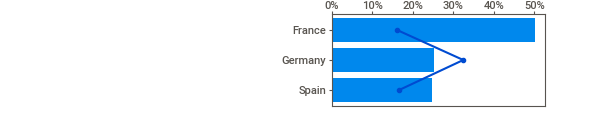
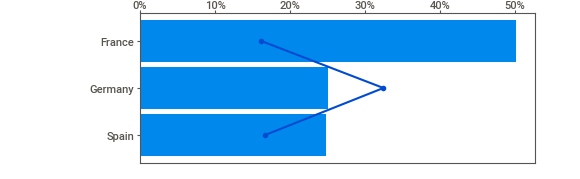
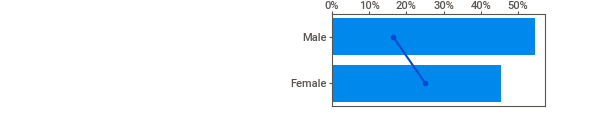
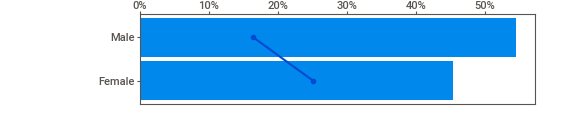
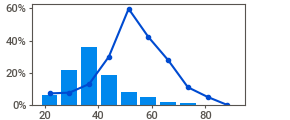
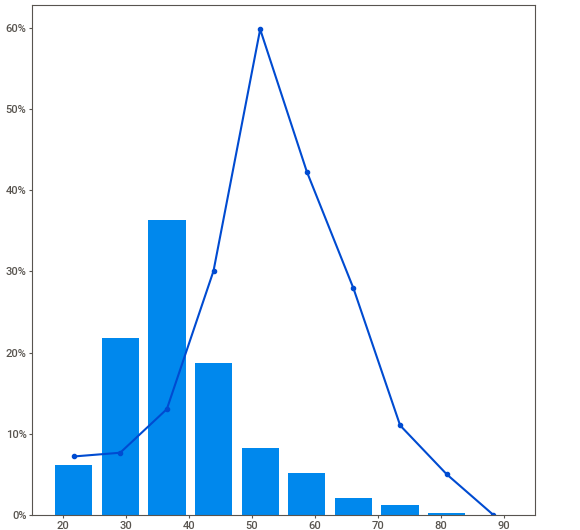
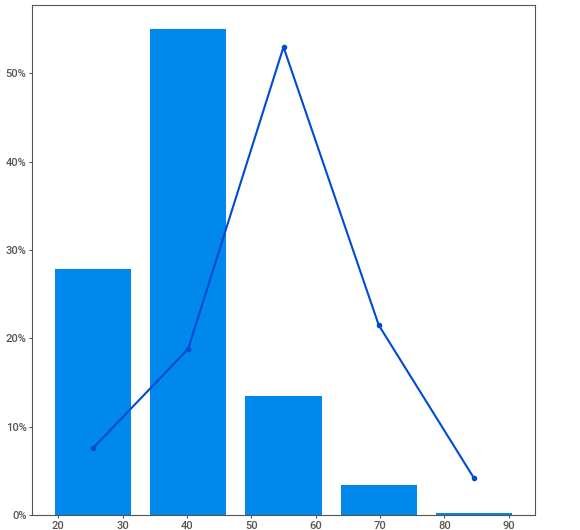
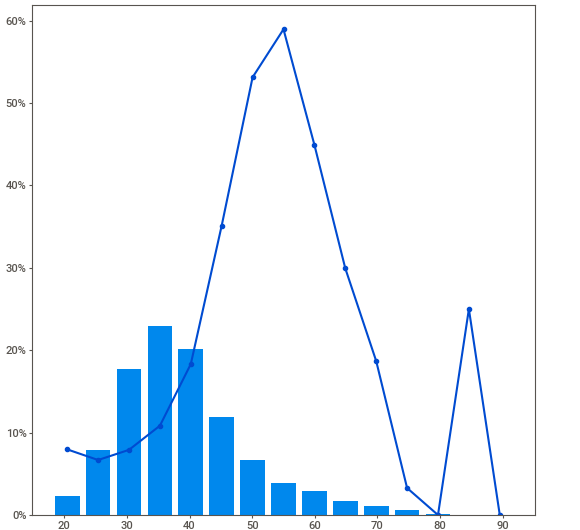
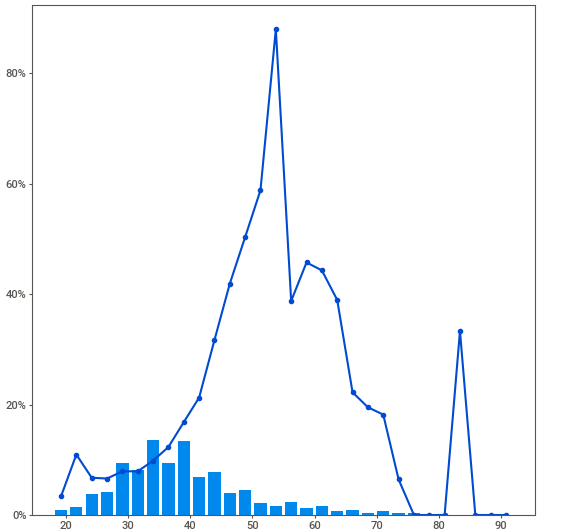
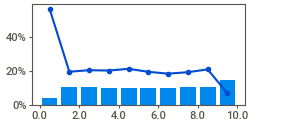
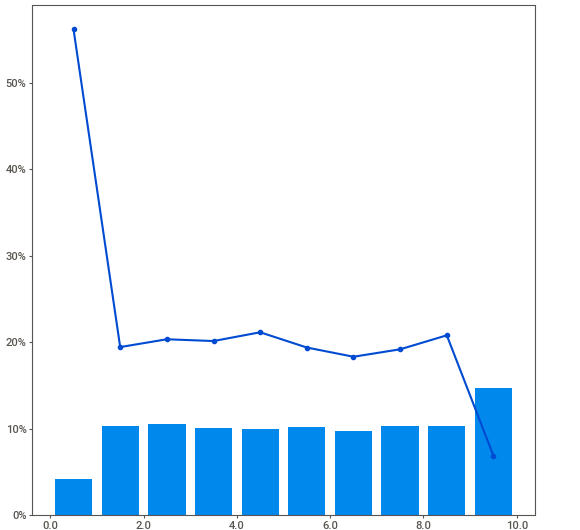
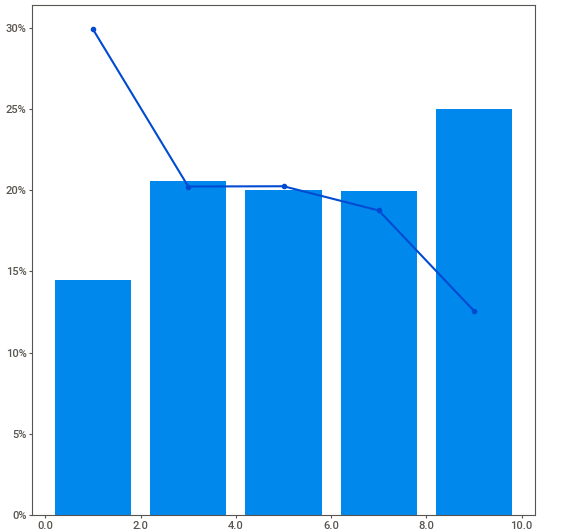
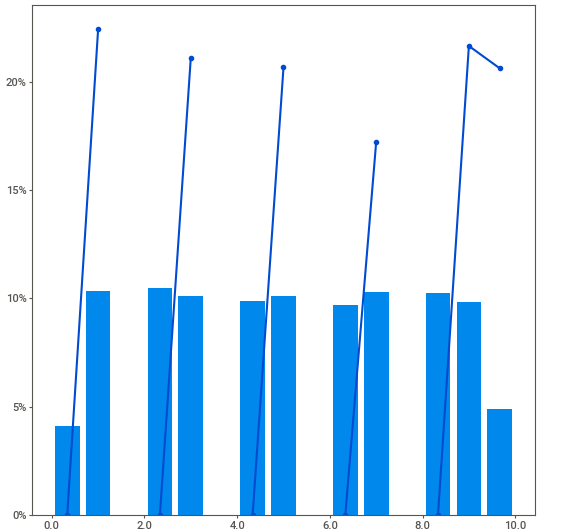
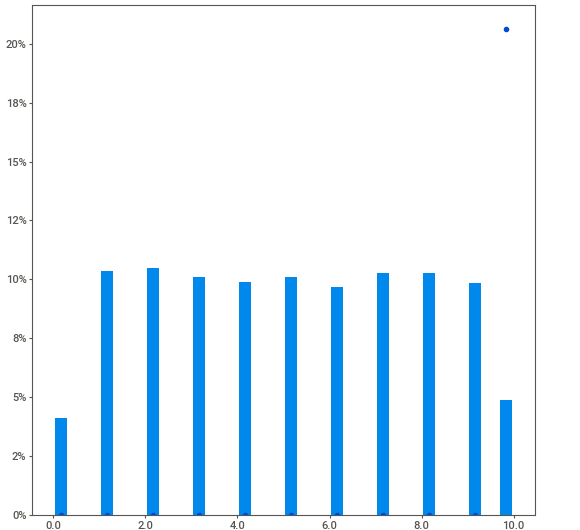
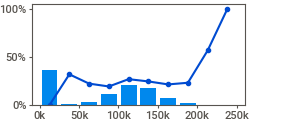
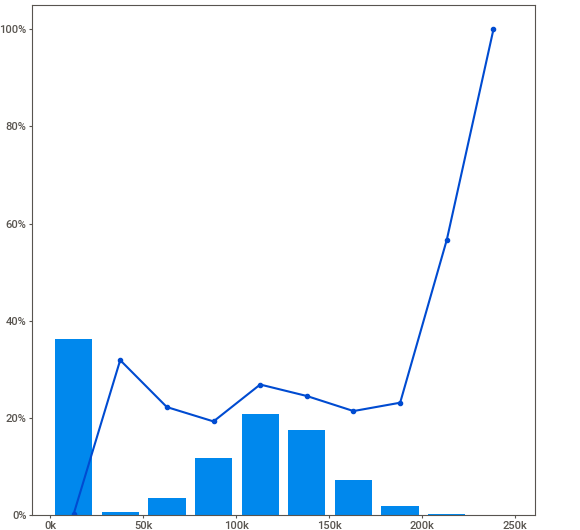
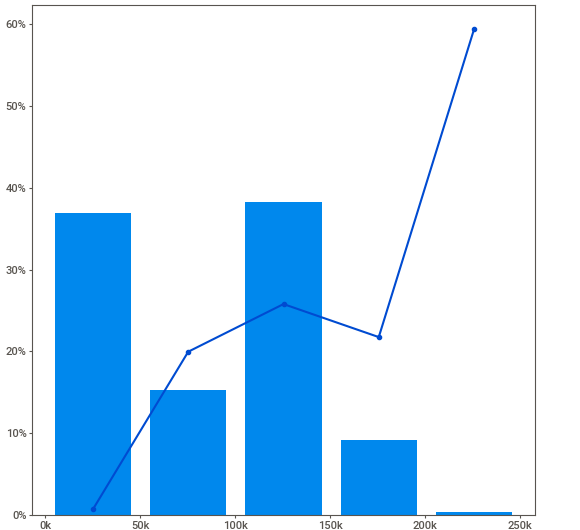
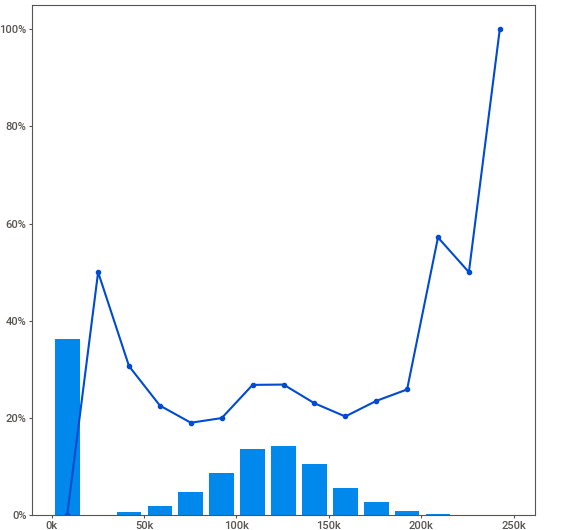
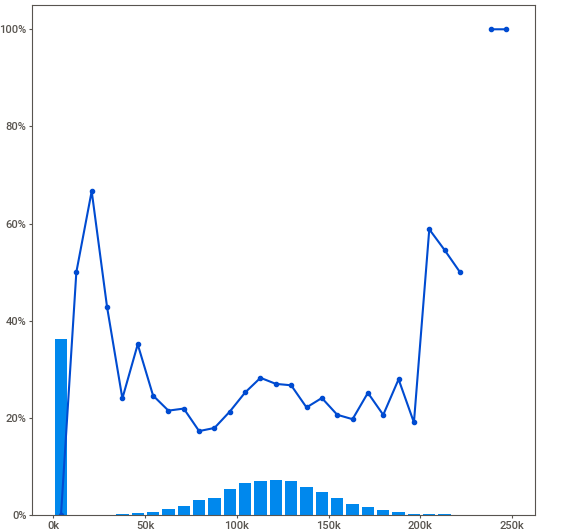
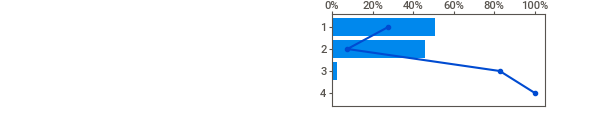
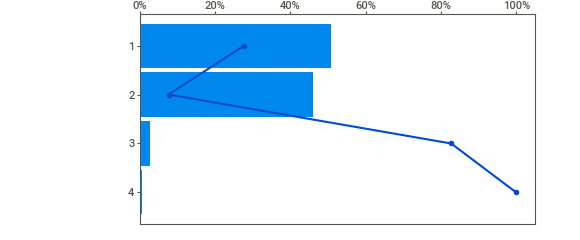
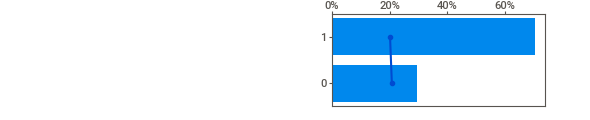
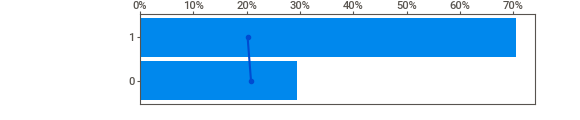
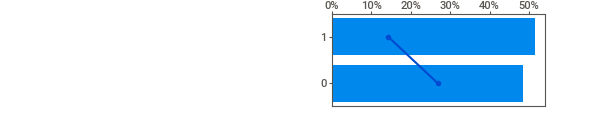
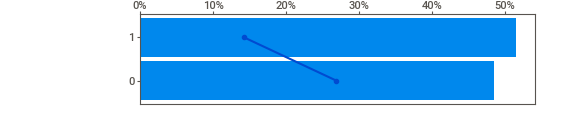
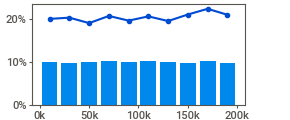
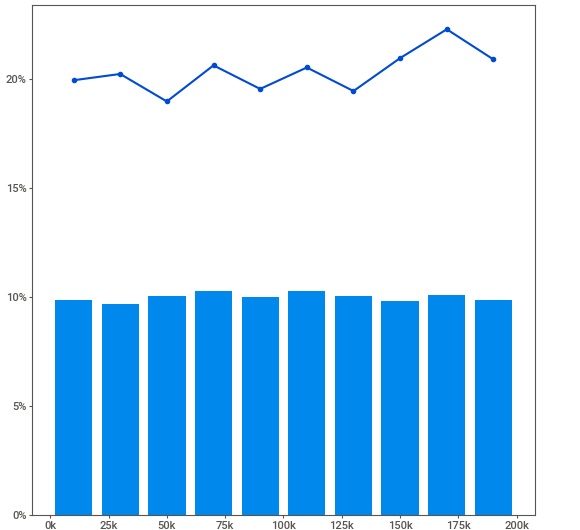
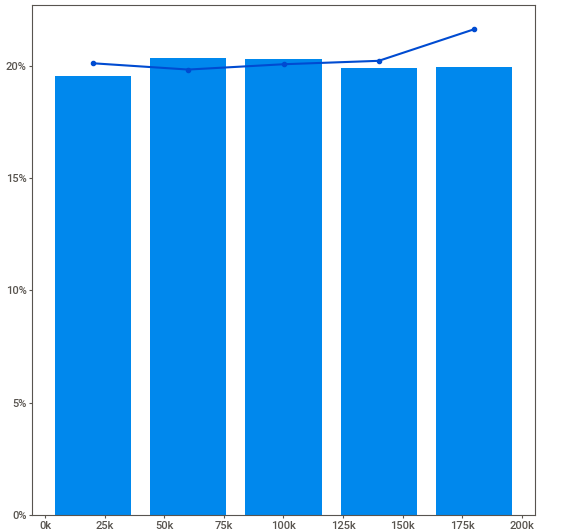
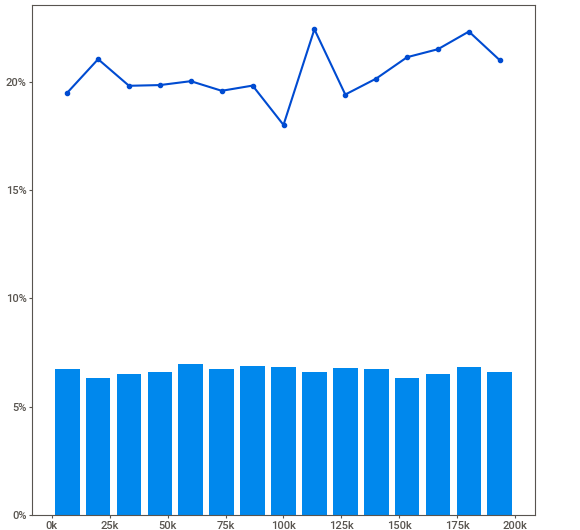
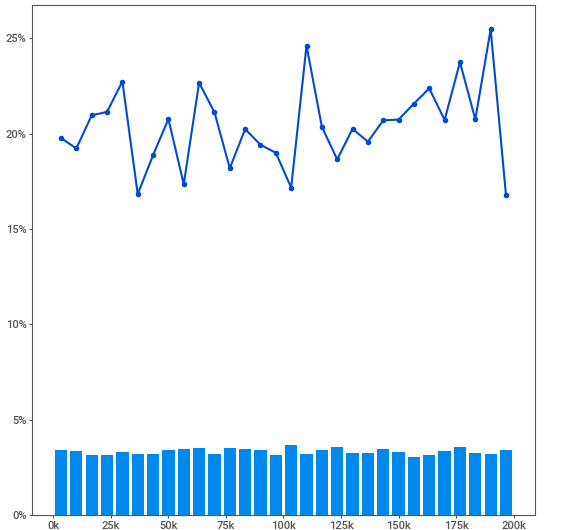
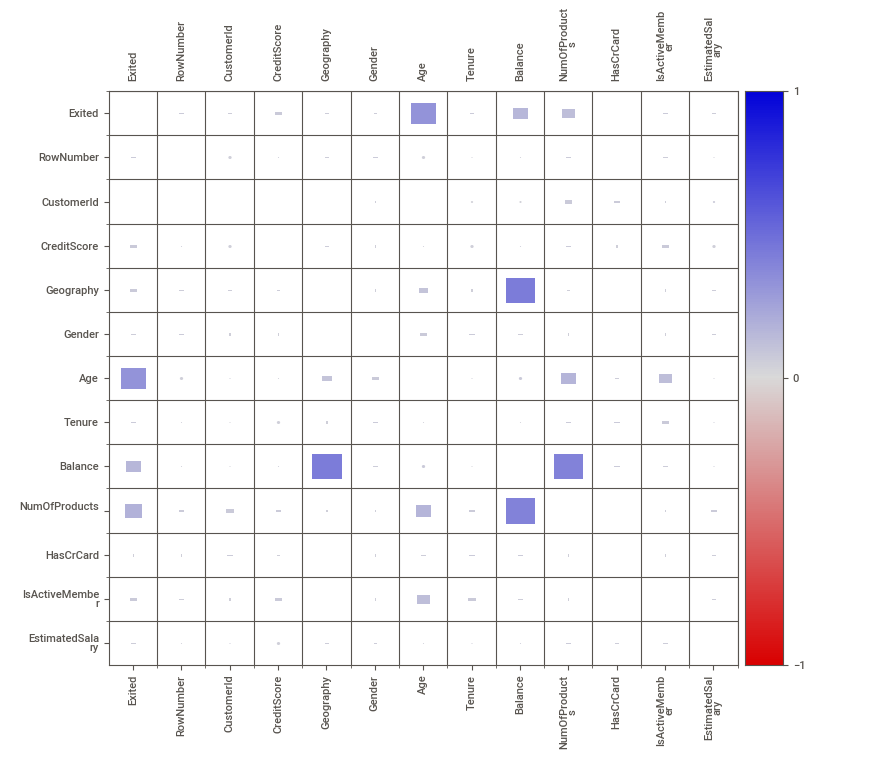
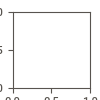

In [ ]:
eda = sv.analyze(source=dados, target_feat='Exited')
eda.show_notebook()

insights preliminares:
* Age possui distribuição assimátrica a direita, muitos clientes possuem entre 30 a 45 anos e poucos com idade superior a 60 anos.
* Balance mostra que há uma proporcionalidade direta de clientes que possuem pouco dinheiro na conta, essa variável está inflada de zeros, e quando não é zero, tem valores altíssimos. Pode significar que clientes possuem outra conta.
* CreditScore tem uma leve assimatria a direita, indicando um número elevado de clientes com score alto.
* Salário estimado está distribuida uniformemente, com frequências similares entre os salários, baixo, médio e alto.
* Tenure tem uma alta frequência no índice 10, ou seja, muitos têm alta estabilidade, já poucos tem baixa estabilidade.
* A maioria dos clientes possuem entre 1 a 2 produtos, já poucos possuem 3 ou mais produtos.
* A maioria possui cartão de crédito.
* Frequências similares de clientes que movimentam ou não a conta.
* Poucos cancelaram sua conta, cerca de 2000, em contrapartida, 8000 a mantém.
* 6 categóricas, 7 numéricas e 1 de texto
* 80% de 0 e 20% de 1 na target, aproximadamente, " desbalanceamento "
uniforme em credscore
* espanha e frança possuem indice menor de churn, na alemanha passa os 30%
* female possui 25% a mais que male de churn
* maior churn a medida que idade aumenta(assimétrica)
* mudança brusca nos indices de tenure, em 0 anos e 10 anos, distinct class
churn bem baixo quando balance = 0, aumenta com o balance maior
com 2 produtos, tem siginificamente menos churn que 1 produto apenas
* sem diferença para cartão de crédito
* membros ativos tem bem menos churn que membros não ativos
* leve tendência de alta, para salário estimado

In [ ]:
dados.info()
# 14 features, e 1000 entradas no dataset, do tipo int, float e object
# cat = ['Gender','Geography','HasCrCard','IsActiveMember']
# num = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
# target = Exited

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dados.describe()
# em média 39 anos, mínima de 18 e máxima 92 anos
# crédito fica em torno dos 650 pontos
# índice médio de estabilidade de em prego é 5
# em média 76 400 dólares na conta
# 1,5 produtos no banco em média
# 100 000 dólares em média de salário estimado
# 70% mpossuem cartão de crédito
# 51% ativos no banco, ou seja, fazem movimentação bancária constantemente
# 20% dos clientes romperam com a empresa, então já visível o desbalanceamento dos dados

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


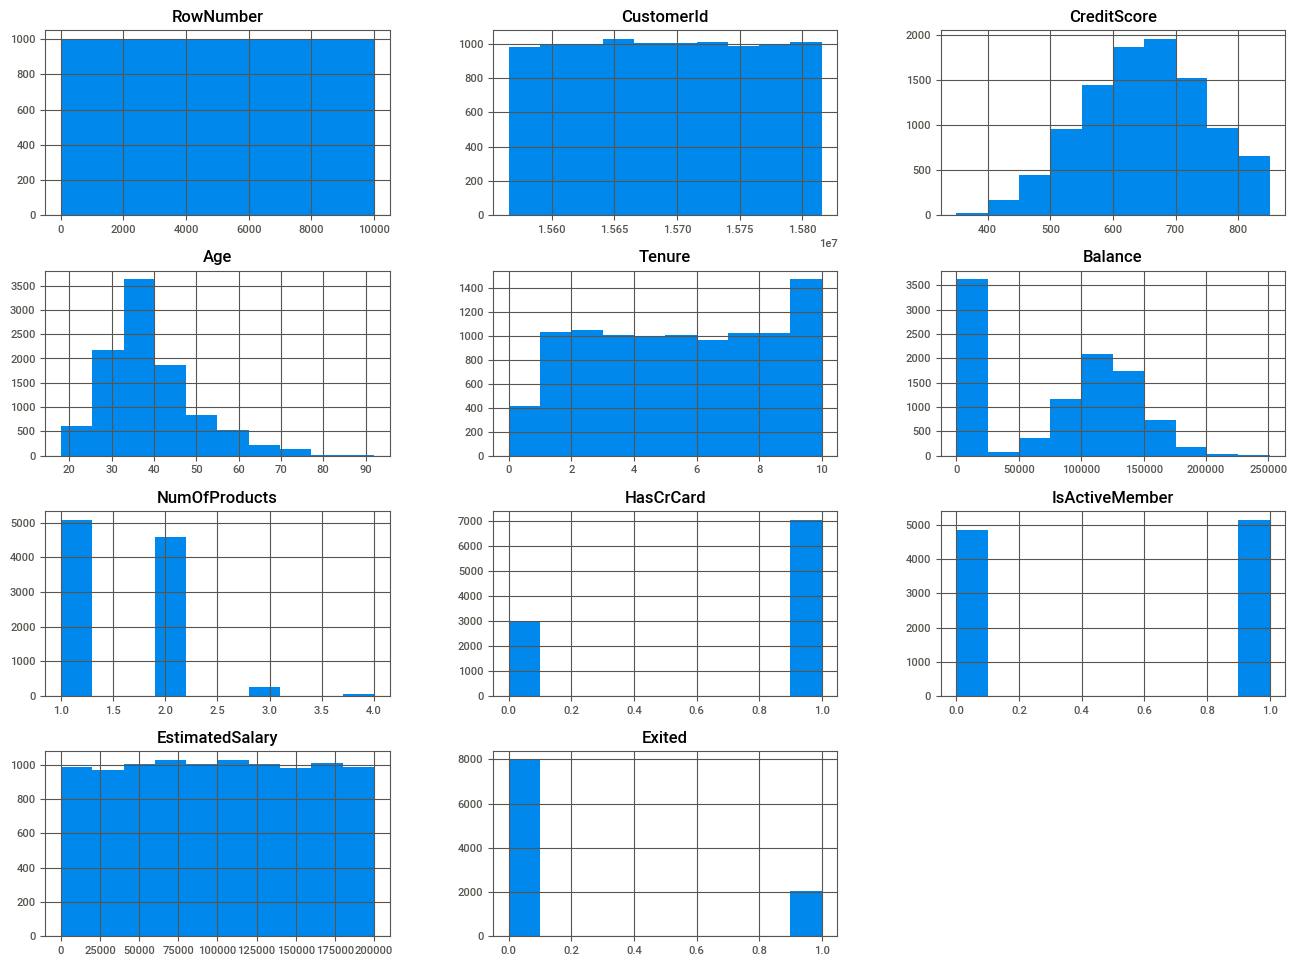

In [ ]:
dados.hist(figsize=(16,12))   # features por quantidade de amostras
plt.show()                    # analisando os tipos de distribuições nos dados

# possíveis variáveis a ser ajustadas:

# age com cauda a direita, possíveis outliers.
# balance com quantidades discrepantes de zeros na variável, e quando não é zero, é valores altíssimos, muito discrepante as escalas.
# numofproducts com poucos dados em 3 e 4, com 4 quase zerada, pouca variância, muito enviezada.
# target desbalanceada, com 20% apenas de valores considerados churn.

Features numéricas em relação a target

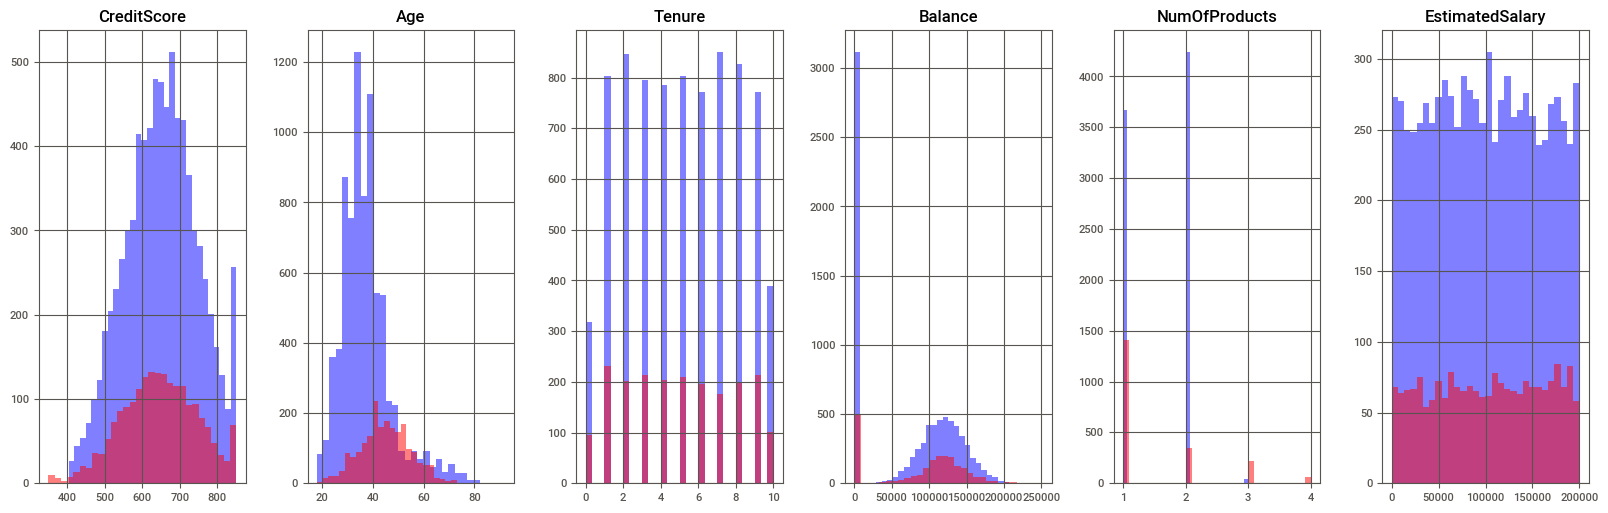

In [ ]:
# visualização das features numéricas pelas classes da target [0,1]
num = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
fig, ax = plt.subplots(1, 6, figsize=(20,6));
dados[dados.Exited == 0][num].hist(bins=30, color='blue',alpha=0.5, ax=ax)
dados[dados.Exited == 1][num].hist(bins=30, color='red',alpha=0.5, ax=ax )
plt.show()

* A evasão é maior com pessoas com idade entre 40 e 60 e com score entre 600 e 700
* Quanto maior o número de produtos, maior a evasão, preliminarmente supondo.

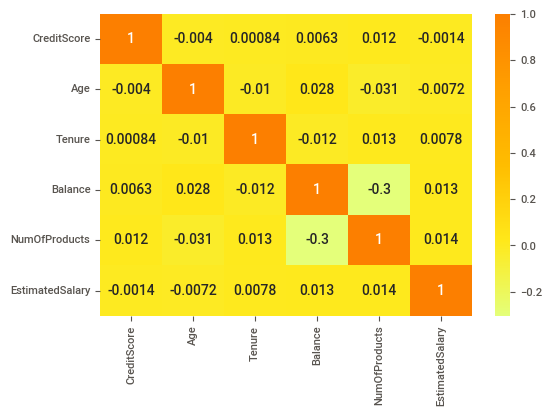

In [ ]:
# analisando a correlação entre as features numéricas

dados_corr = dados[num]
sns.heatmap(dados_corr.corr(), annot=True, cmap='Wistia')
plt.show()

Temos baixas correlações entre as variáveis numéricas. A maior é de 0.3, entre número de produtos e saldo bancário, sendo negativa, significa que quando maior o número de produtos, menor o saldo.

#### Perfil de clientes que cancelaram contrato









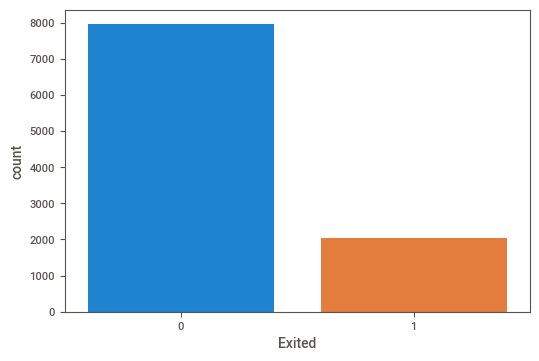

0    7963
1    2037
Name: Exited, dtype: int64


In [ ]:
sns.countplot(data=dados, x='Exited')
plt.show()
print(dados.Exited.value_counts())

É notório um desbalanceamento da target, ou seja, a proporção entre clientes que cancelaram e não cancelaram é discrepante, o que pode impactar os resultados da previsão do modelo, 20% 1 e 80% 0. Como resultado, se espera um modelo enviesado, com uma boa acurácia, porém, quando se olha as métricas de cada classe especificamente, vai obter resultados discrepantes, tendo, por exemplo, um bom recall (métrica que indica o quanto modelo acerta para aquela classe específica) para a classe 0 e um baixo recall para a classe 1, visto que tem poucas amostras dessa classe no dataset.


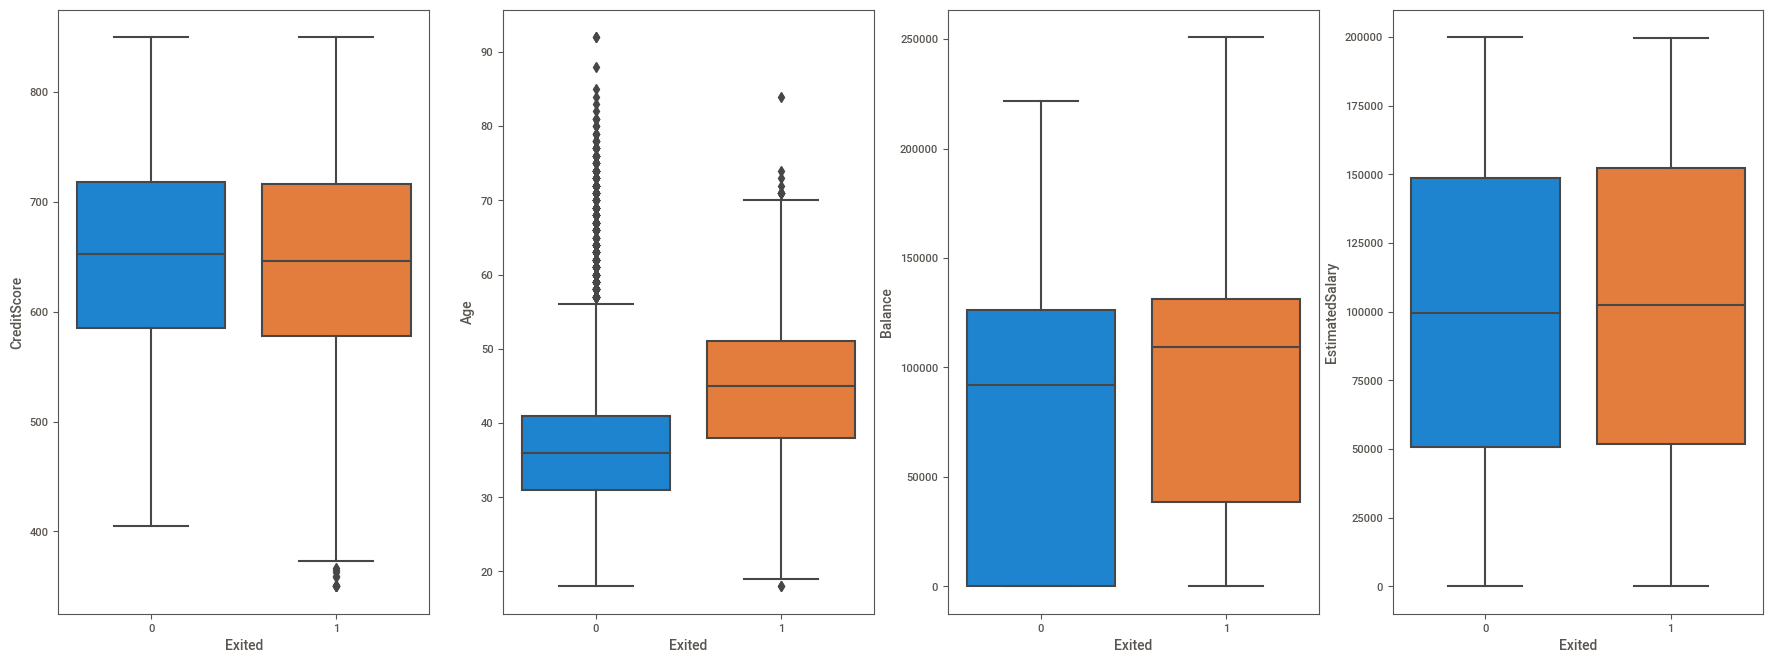

In [ ]:
# visualizando distribuição das features pelas classes da target.

num_cont = ['CreditScore','Age','Balance','EstimatedSalary']
plt.figure(figsize=(22,8))
plt.subplot(1, 4, 1);
sns.boxplot(x='Exited', y='CreditScore', data=dados)
plt.subplot(1, 4, 2);
sns.boxplot(x='Exited', y='Age', data=dados)  # muitos outliers
plt.subplot(1, 4, 3);
sns.boxplot(x='Exited', y='Balance', data=dados)
plt.subplot(1, 4, 4);
sns.boxplot(x='Exited', y='EstimatedSalary', data=dados)
plt.show()

* clientes que cancelam possuem um saldo bancário maior do que clientes que não cancelaram.
* salário estimado parece não influenciar na evasão.
* clientes que cancelam têm idade maior, do que aqueles que não cancelaram. Com muitos outliers.
* creditScore parece não influenciar na taxa de evasão. Entretanto, com outliers na parte inferior, e com um limite inferior menor do que o boxplot dos clientes que não cancelaram o contrato, é notório que clientes que cancelaram o contrato possuem score menor.

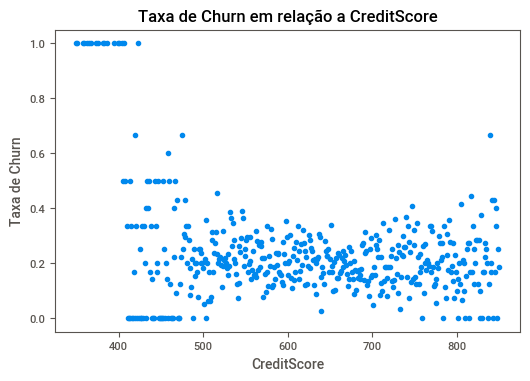

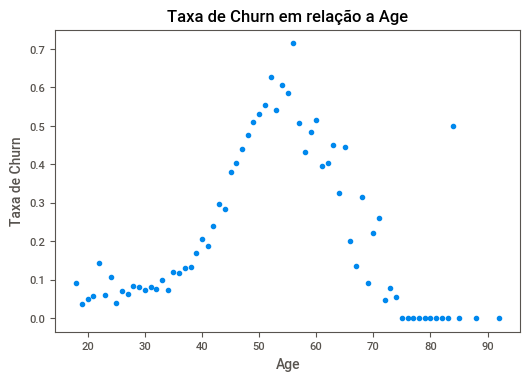

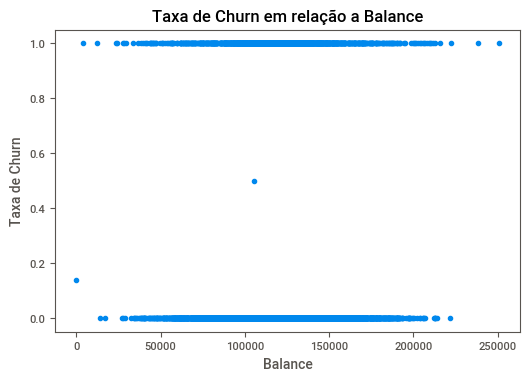

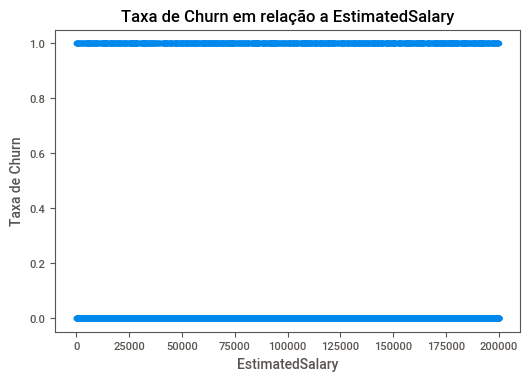

In [ ]:
for i in num_cont:
    df = dados.groupby(i).Exited.mean().reset_index()
    x = df[i]
    y = df['Exited']
    plt.scatter(x,y)
    plt.xlabel(i)
    plt.ylabel('Taxa de Churn')
    plt.title(f'Taxa de Churn em relação a {i}')
    plt.show()

Pela análise dos gráficos de dispersão, é notório que taxa de evasão é maior em clientes que possuem baixo score de crédito, ou seja, clientes que possuem alto risco de inadiplência também possuem maior propensão de evasão. Pessoas entre 50 e 60 anos tem maiores taxas de churn e com mais de 75 anos tem risco quase zero de abandonar os serviços. Já as demais features, se mantém uma similaridade.

#### FEATURES CATEGÓRICAS EM RELAÇÃO A CLIENTES

Proporcionalidade de Exited em relação a Gender


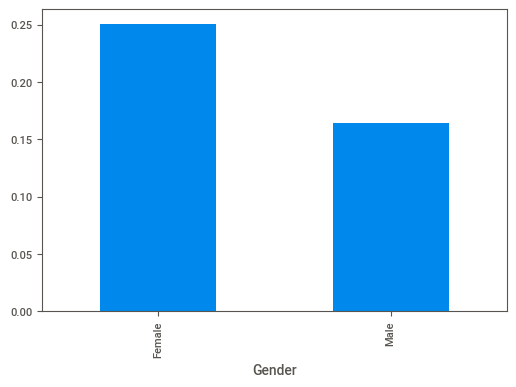

Proporcionalidade de Exited em relação a Geography


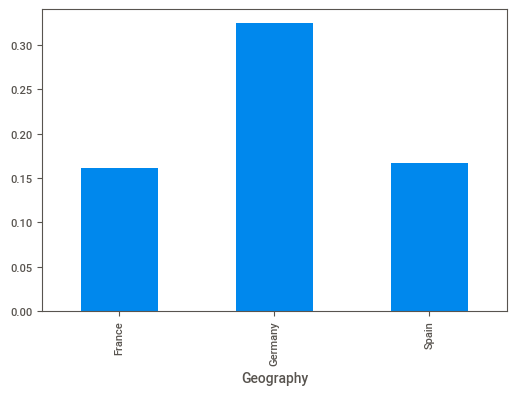

Proporcionalidade de Exited em relação a HasCrCard


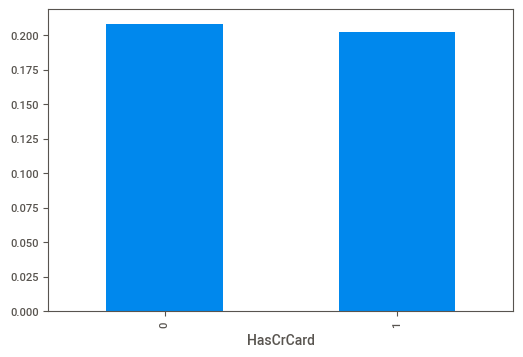

Proporcionalidade de Exited em relação a IsActiveMember


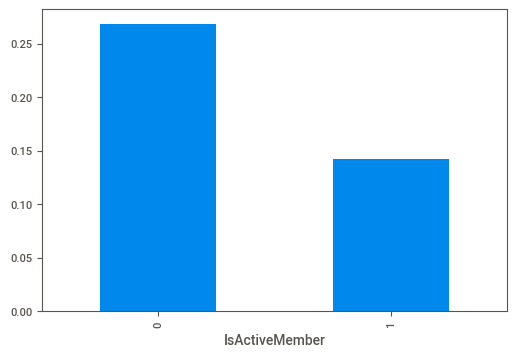

In [ ]:
cat = ['Gender','Geography','HasCrCard','IsActiveMember']

for i in cat:
    print(f'Proporcionalidade de Exited em relação a {i}')
    dados.groupby(i).mean()['Exited'].plot(kind='bar')
    plt.show()

insigths: 
* Mulheres tem o risco maior de evasão que homens
* Alemanha tem taxa de evasão bastante elevada em relação aos demais países, 32% cancelam contrato. Já França e Espanha têm taxas similares de 16%
* Proporcionalidades similares em ter cartão de crédito ou não, vizualmente parece não influenciar.
* A evasão é maior em clientes não ativos, com uma diferença em 12% em relação a ativos.  



Características preliminares de clientes que cancelam os serviços.

Algumas características relevantes entre a maioria dos clientes com taxas de churn ALTAS, até o momento:


1. São da Alemanha
2. São do sexo feminino
3. Não são membros ativos
4. Elevado número de produtos, em torno de 3 ou 4 (SUPERFICIAL)
5. Com baixo score de crédito
6. Saldo bancário elevado
7. Com idade entre 50 e 60 anos

Dessa forma, clientes com essas características possuem maiores probabilidades de cancelarem o serviço.
Uma forma de reduzir a taxa de Churn é justamente prever quais clientes possuem maiores riscos de evasão, pois assim será possível a tomada de medidas preventivas.





### Pré-processamento de Dados ( EDA )

Etapas:
 * Eliminar features não relevantes para o modelo.
 * Identificar dados missing.
 * Separar features cat, num e target.
 * Processamento de cat.
 * Processamento de num.



Preliminarmente, é comum a eliminação de features do dataset que não trazem utilidades práticas. Neste caso, temos a RowNumber, CustomerId e surname, pois não trazem informações importantes para o modelo, a ponto de entender o churn de clientes.

In [ ]:
# drop em features que não retornam informações 

dados1 = dados.drop(['RowNumber',	'CustomerId',	'Surname'], axis=1)  
dados1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# verificando dados missing 

dados.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

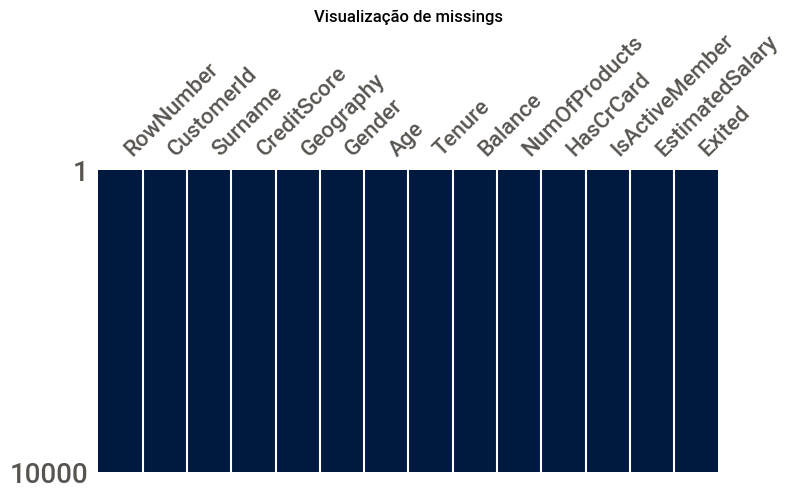

In [ ]:
missing.matrix(dados, figsize=(8,4), color=(0, 0.1, 0.25), sparkline=False)
plt.title('Visualização de missings')
plt.show()

Proporcionalidade de Exited em relação a Tenure


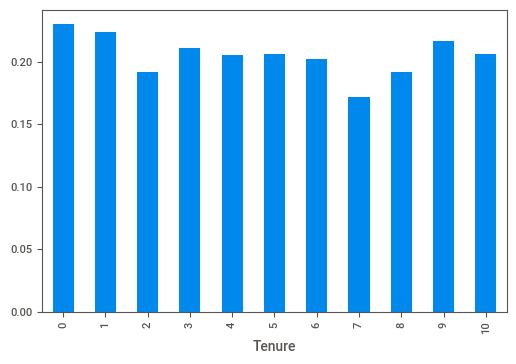

Proporcionalidade de Exited em relação a NumOfProducts


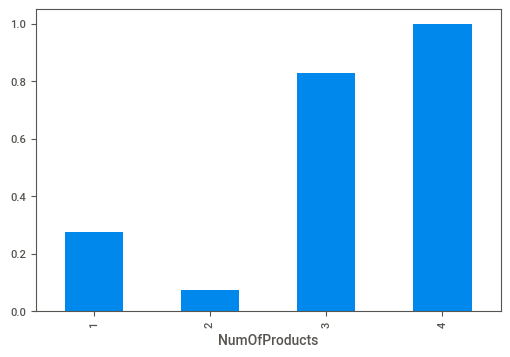

In [ ]:
num_disc = ['Tenure','NumOfProducts']  # features numéricas discretas (inteiras) em relação a target

for i in num_disc:
    print(f'Proporcionalidade de Exited em relação a {i}')
    dados.groupby(i).mean()['Exited'].plot(kind='bar')
    plt.show()

# observe que, preliminarmente, parece que quanto maior o número de produtos, maior o índice de churn.
# da mesma forma, uma leve tendência de alta do churn se tenure for menor, ou seja, a estabilidade de emprego for baixa.

### **NumOfProducts**

------------------------------
Quantidade Por Classe 
------------------------------
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
----------------------------------------
Proporção de Churn em cada classe 
----------------------------------------


NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64

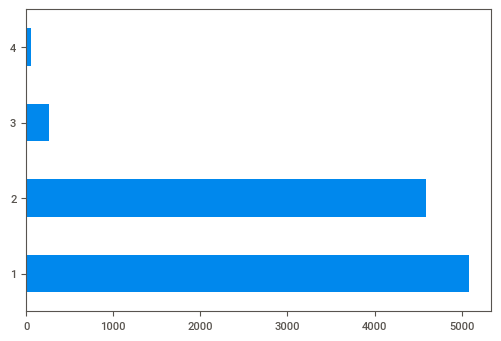

In [ ]:
dados['NumOfProducts'].value_counts().plot(kind = 'barh');  # poquissimos dados em 3 e 4
print('-'*30)
print('Quantidade Por Classe ')
print('-'*30)
print(dados['NumOfProducts'].value_counts())
print('-'*40)
print('Proporção de Churn em cada classe ')
print('-'*40)
dados1.groupby('NumOfProducts').mean()['Exited']

Podemos observar que, como tem poucas amostras em 4, apenas 60 dados, o viés dela é muito alto, sua variância é baixa, tendo um número altíssimo de amostras churn ( 100% da classe 4 deu churn ), mas que na realidade, são poucos dados ( comparado ao total da feature ), por ser mínima a amostra. Isso significa que a amostra de dados nessa classe não é confiável, e pode alterar o resultado do modelo. É necessário ajustar esta feature, unindo, neste notebook, as classes 1, 2 e 3, para ter números de dados mais similares nas amostras das classes, diminuindo o enviesamento.

NumProd1     5084
NumProd2+    4916
Name: NumOfProducts, dtype: int64
NumOfProducts
NumProd1     0.277144
NumProd2+    0.127746
Name: Exited, dtype: float64


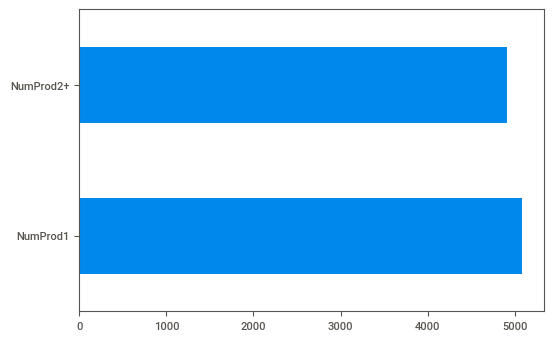

In [ ]:
# função para formação de apenas duas classes na feature numofproducts, com o fito de diminuir o enviezamento das classes 4 e 3.

def aux(x):
    if x == 1:
        return 'NumProd1'
    else:
        return 'NumProd2+'

dados1['NumOfProducts'] = dados1['NumOfProducts'].apply(aux)
dados1['NumOfProducts'].value_counts().plot(kind = 'barh');  # quantidade de amostras em cada classe
print(dados1['NumOfProducts'].value_counts())
print(dados1.groupby('NumOfProducts').mean()['Exited'] )

NumProd1     1409
NumProd2+     628
Name: NumOfProducts, dtype: int64
NumProd1     5084
NumProd2+    4916
Name: NumOfProducts, dtype: int64


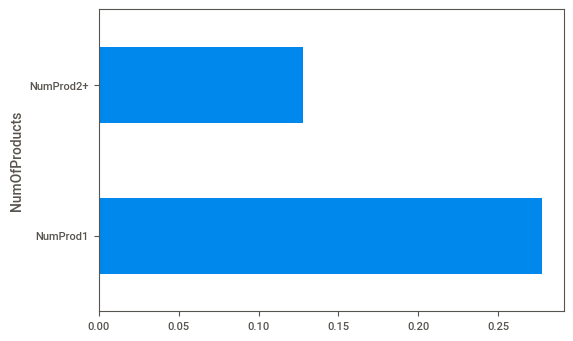

In [ ]:
dados1.groupby('NumOfProducts').mean()['Exited'].plot(kind='barh')
print(dados1[dados1.Exited == 1]['NumOfProducts'].value_counts())
print(dados1.NumOfProducts.value_counts())

Podemos retirar dos gráficos que quanto menor o número de produtos, maior a evasão, contradizendo o insight inicial e superficial, que retirou uma informação contrária, o que leva a refletir sobre a importancia de análises mais aprofundadas nos dados.

Como tem poucos dados nas classes 3 e 4, em relação a 1 e 2 em número de produtos, foi necessário amenizar esse desbalanceamento, para não ocasionar previsões errôneas no modelo futuramente.

### **BALANCE**

Já a feature Balance está inflada de zeros, cerca de 36% (sweetviz) dos dados estão zerados nessa feature, e quando não é zerada, tem valores altíssimos. Para modelos de proporção e distância, como knn, pode ser prejudicial aos resultados.


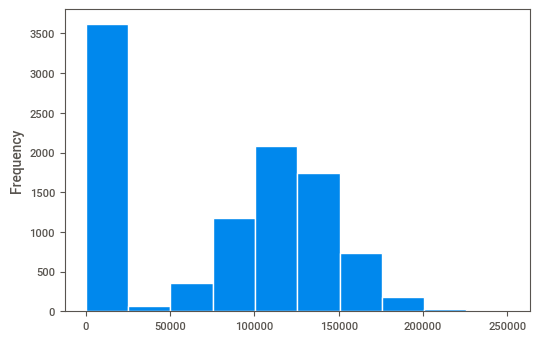

In [ ]:
dados['Balance'].plot(kind ='hist', edgecolor = 'white')
plt.show()

# é notório uma quantidade discrepante de zeros na feature.

In [ ]:
dados.Balance.describe() # observando estatísticas da feature

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [ ]:
dados[dados['Balance'] > 0]['Balance'].describe() # retirando a CLASSE zerada, e avaliando novamente as estatísticas

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

algumas formas de agrupamento :
* 1/4 menor que 100000, 1/4 entre 100000 e 120000, 1/4 entre 120000 e 140000 e 1/4 maior que 140000
*  média e mediana bem aproximadas, ou seja, gráfico simétrico.
* primeiro quartil = 100 000 || segundo quartil = 120 000 || terceiro quartil = 140 000

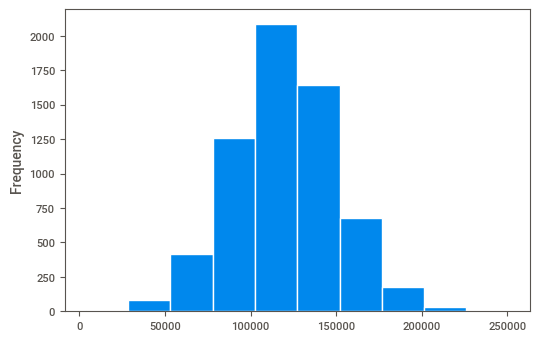

In [ ]:
# quando se retira essas amostras zeradas da feature, pode-se reparar que se torna mais distribuída, similar a uma gaussiana.

dados[dados['Balance'] > 0]['Balance'].plot(kind = 'hist', edgecolor = 'white')
plt.show()

O objetivo é transformar a covariável Balance de numérica para categórica, e assim, aumentar número de amostras em intervalos de valores, e não ficar tão discrepante a classe zerada. Observe como já é similar a várias classes de apenas um valor, o que se fará a seguir é apenas unir essas "classes", visto que a classe zerada já está praticamente formada.


In [ ]:
def aux(x):
    if x == 0:
        return 'Zerada'
    elif x < 100000:
        return 'Até 100k'
    elif x < 120000:
        return '100k - 120k'
    elif x < 140000:
        return '120k - 140k'
    else:
        return '140k+'

dados1['Balance'] = dados1['Balance'].apply(aux)
dados1.head()  # categorização de Balance e NumOfProducts

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,Zerada,NumProd1,1,1,101348.88,1
1,608,Spain,Female,41,1,Até 100k,NumProd1,0,1,112542.58,0
2,502,France,Female,42,8,140k+,NumProd2+,1,0,113931.57,1
3,699,France,Female,39,1,Zerada,NumProd2+,0,0,93826.63,0
4,850,Spain,Female,43,2,120k - 140k,NumProd1,1,1,79084.10,0


Zerada         3617
120k - 140k    1632
100k - 120k    1618
Até 100k       1584
140k+          1549
Name: Balance, dtype: int64


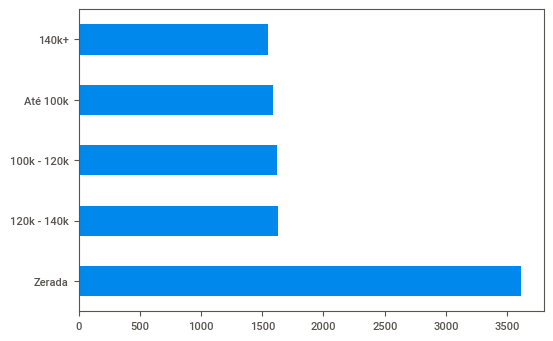

In [ ]:
dados1['Balance'].value_counts().plot(kind ='barh')
print(dados1.Balance.value_counts())
plt.show()

In [ ]:
print('-'*30)
print('Proporção de Churn por classe')
print('-'*30)
print(dados1.groupby('Balance').mean()['Exited'])
print('-'*30)
print('Quantidade de Churn por classe')
print('-'*30)
print(dados1[dados1.Exited == 1]['Balance'].value_counts())

------------------------------
Proporção de Churn por classe
------------------------------
Balance
100k - 120k    0.275649
120k - 140k    0.250000
140k+          0.230471
Até 100k       0.205808
Zerada         0.138236
Name: Exited, dtype: float64
------------------------------
Quantidade de Churn por classe
------------------------------
Zerada         500
100k - 120k    446
120k - 140k    408
140k+          357
Até 100k       326
Name: Balance, dtype: int64


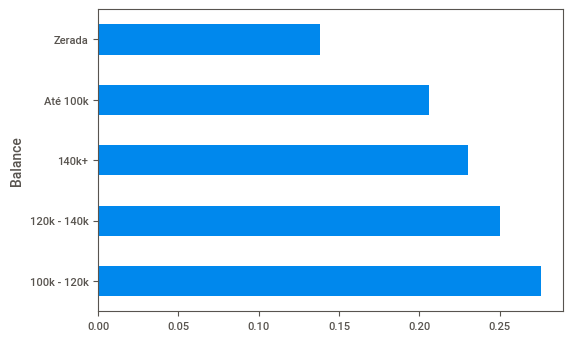

In [ ]:
dados1.groupby('Balance').mean()['Exited'].plot(kind='barh') 
# apesar da classe zerada ter maior quantidade de dados, menos de 14% dos clientes com 0 na conta dão churn
# ou seja, a maior concentração me churn nessa covariável é visível na classe de 100 000 a 120 000 na conta

### **TENURE**

In [ ]:
dados['Tenure'].value_counts() # equidistribuída, com exceção de 0 anos e 10 anos, com menores amostras

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

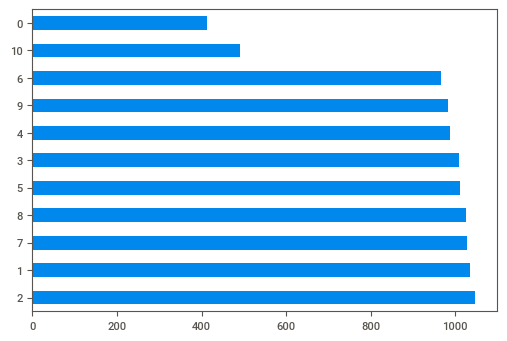

In [ ]:
dados['Tenure'].value_counts().plot(kind='barh')

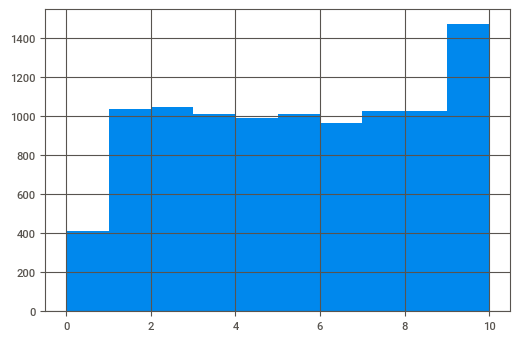

In [ ]:
dados.Tenure.hist()
plt.show()

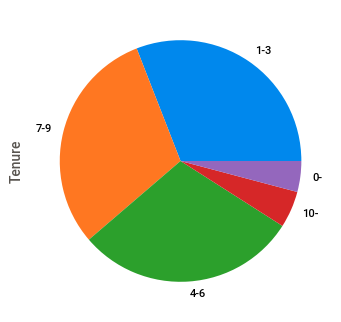

In [ ]:
# critérios: mesma quantidade de elementos aproximadamente e mesma proporcionalidade da target

def aux(x):
    if x == 0:
        return '0-'
    elif x <= 3:
        return '1-3'
    elif x <= 6:
        return '4-6'
    if x <= 9:
        return '7-9'
    else:
        return '10-'

dados1['Tenure'] = dados1['Tenure'].apply(aux)

dados1['Tenure'].value_counts().plot(kind = 'pie');

In [ ]:
print('-'*30)
print('Total da amostra por classe')
print('-'*30)
print(dados1.Tenure.value_counts())
print('-'*30)
print('Total de churn por classe')
print('-'*30)
print(dados1[dados1.Exited == 1]['Tenure'].value_counts())
print('-'*30)
print('Proporção de churn em cada classe')
print('-'*30)
print(dados1.groupby('Tenure').mean()['Exited'])

------------------------------
Total da amostra por classe
------------------------------
1-3    3092
7-9    3037
4-6    2968
10-     490
0-      413
Name: Tenure, dtype: int64
------------------------------
Total de churn por classe
------------------------------
1-3    646
4-6    608
7-9    587
10-    101
0-      95
Name: Tenure, dtype: int64
------------------------------
Proporção de churn em cada classe
------------------------------
Tenure
0-     0.230024
1-3    0.208926
10-    0.206122
4-6    0.204852
7-9    0.193283
Name: Exited, dtype: float64


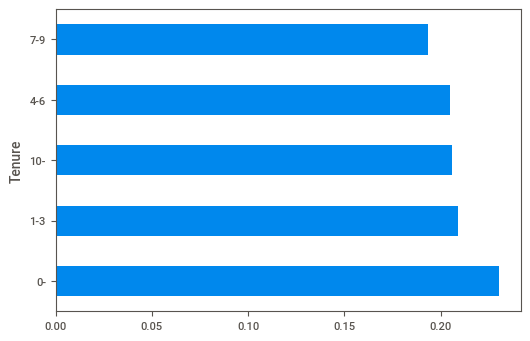

In [ ]:
dados1.groupby('Tenure').mean()['Exited'].plot(kind='barh')
plt.show()

In [ ]:
dados1
# features alteradas : tenure, balance e  numofproducts (num para cat)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,1-3,Zerada,NumProd1,1,1,101348.88,1
1,608,Spain,Female,41,1-3,Até 100k,NumProd1,0,1,112542.58,0
2,502,France,Female,42,7-9,140k+,NumProd2+,1,0,113931.57,1
3,699,France,Female,39,1-3,Zerada,NumProd2+,0,0,93826.63,0
4,850,Spain,Female,43,1-3,120k - 140k,NumProd1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,4-6,Zerada,NumProd2+,1,0,96270.64,0
9996,516,France,Male,35,10-,Até 100k,NumProd1,1,1,101699.77,0
9997,709,France,Female,36,7-9,Zerada,NumProd1,0,1,42085.58,1
9998,772,Germany,Male,42,1-3,Até 100k,NumProd2+,1,0,92888.52,1


In [ ]:
# Separação de variáveis segundo seu tipo

# variável dependente, aquela que se quer prever, a target = Exited
# covariáveis, independentes, vão explicar a taxa de churn = features cat e num

y = dados1['Exited']  # dependente
x = dados1.drop('Exited', axis=1)  # independentes 

In [ ]:
# numéricas contínuas
x_num = ['CreditScore','Age','EstimatedSalary']


# categóricas = dependentes - numéricas
x_cat = list(set(x) - set(x_num))
sep = x[x_cat]
sep  # uma variável apenas com as features categóricas

,Gender,IsActiveMember,Tenure,NumOfProducts,Geography,HasCrCard,Balance
0,Female,1,1-3,NumProd1,France,1,Zerada
1,Female,1,1-3,NumProd1,Spain,0,Até 100k
2,Female,0,7-9,NumProd2+,France,1,140k+
3,Female,0,1-3,NumProd2+,France,0,Zerada
4,Female,1,1-3,NumProd1,Spain,1,120k - 140k
...,...,...,...,...,...,...,...
9995,Male,0,4-6,NumProd2+,France,1,Zerada
9996,Male,1,10-,NumProd1,France,1,Até 100k
9997,Female,1,7-9,NumProd1,France,0,Zerada
9998,Male,0,1-3,NumProd2+,Germany,1,Até 100k


In [ ]:
# trabalhando na variável Gender e NumOfProducts, com o fito de transformá-la para num, como só tem duas possíveis categorias, usa-se LabelEncoder.
label = ['Gender','NumOfProducts']

def labelencoder():
    for i in label:
        x[i] = LabelEncoder().fit_transform(x[i])   # valores transformados em 1 e 0
    
labelencoder()
x.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,1-3,Zerada,0,1,1,101348.88
1,608,Spain,0,41,1-3,Até 100k,0,0,1,112542.58
2,502,France,0,42,7-9,140k+,1,1,0,113931.57
3,699,France,0,39,1-3,Zerada,1,0,0,93826.63
4,850,Spain,0,43,1-3,120k - 140k,0,1,1,79084.10
5,645,Spain,1,44,7-9,100k - 120k,1,1,0,149756.71
6,822,France,1,50,7-9,Zerada,1,1,1,10062.80
7,376,Germany,0,29,4-6,100k - 120k,1,1,0,119346.88
8,501,France,1,44,4-6,140k+,1,0,1,74940.50
9,684,France,1,27,1-3,120k - 140k,0,1,1,71725.73


In [ ]:
# get_dummies para features com mais de duas categorias.
columns = ['Geography','Balance','Tenure']
x_finish = pd.get_dummies(data = x, columns = columns)
x_finish.head()

,CreditScore,Gender,Age,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Balance_100k - 120k,Balance_120k - 140k,Balance_140k+,Balance_Até 100k,Balance_Zerada,Tenure_0-,Tenure_1-3,Tenure_10-,Tenure_4-6,Tenure_7-9
0,619,0,42,0,1,1,101348.88,1,0,0,0,0,0,0,1,0,1,0,0,0
1,608,0,41,0,0,1,112542.58,0,0,1,0,0,0,1,0,0,1,0,0,0
2,502,0,42,1,1,0,113931.57,1,0,0,0,0,1,0,0,0,0,0,0,1
3,699,0,39,1,0,0,93826.63,1,0,0,0,0,0,0,1,0,1,0,0,0
4,850,0,43,0,1,1,79084.10,0,0,1,0,1,0,0,0,0,1,0,0,0


Variáveis numéricas com escalas discrepantes podem ocasionar problemas no treinamento do modelo, isso é observado nas variáveis EstimatedSalary, age, creditscore e balance. É necessário padronizar as variáveis contínuas, isto é, deixá-las todas em uma escala entre 0 e 1.


In [ ]:
# Transformando as contínuas em escalas similares entre 0 e 1, com o método minmaxscaler.
x_finish[x_num] = MinMaxScaler().fit_transform(x_finish[x_num])
x_finish[x_num]

,CreditScore,Age,EstimatedSalary
0,0.538,0.324324,0.506735
1,0.516,0.310811,0.562709
2,0.304,0.324324,0.569654
3,0.698,0.283784,0.469120
4,1.000,0.337838,0.395400
...,...,...,...
9995,0.842,0.283784,0.481341
9996,0.332,0.229730,0.508490
9997,0.718,0.243243,0.210390
9998,0.844,0.324324,0.464429


In [ ]:
# temos as covariáveis finalizadas para o modelo, numéricas, em escalas entre 0 e 1.

x_finish

,CreditScore,Gender,Age,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Balance_100k - 120k,Balance_120k - 140k,Balance_140k+,Balance_Até 100k,Balance_Zerada,Tenure_0-,Tenure_1-3,Tenure_10-,Tenure_4-6,Tenure_7-9
0,0.538,0,0.324324,0,1,1,0.506735,1,0,0,0,0,0,0,1,0,1,0,0,0
1,0.516,0,0.310811,0,0,1,0.562709,0,0,1,0,0,0,1,0,0,1,0,0,0
2,0.304,0,0.324324,1,1,0,0.569654,1,0,0,0,0,1,0,0,0,0,0,0,1
3,0.698,0,0.283784,1,0,0,0.469120,1,0,0,0,0,0,0,1,0,1,0,0,0
4,1.000,0,0.337838,0,1,1,0.395400,0,0,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,1,1,0,0.481341,1,0,0,0,0,0,0,1,0,0,0,1,0
9996,0.332,1,0.229730,0,1,1,0.508490,1,0,0,0,0,0,1,0,0,0,1,0,0
9997,0.718,0,0.243243,0,0,1,0.210390,1,0,0,0,0,0,0,1,0,0,0,0,1
9998,0.844,1,0.324324,1,1,0,0.464429,0,1,0,0,0,0,1,0,0,1,0,0,0


### Machine Learning

In [ ]:
#smote = SMOTE()
#x_res, y_res = smote.fit_resample(x_finish, y)   # é recomendável usar ?

Tem-se um caso de classificação binária, além disso, tem-se um desbalanceamento na target, com apenas 20% de valores churn, ou seja, valores 1. Por conta disso é necessário muita cautela na escolha dos modelos, estes devem amenizar esse desbalanceamento, não sofrerem tanta influência dos dados. 

In [ ]:
# separando em treino e teste

x_train, x_test, y_train, y_test = train_test_split(x_finish, y, test_size=0.25)

In [ ]:
# modelo KNN

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
result_knn = knn.predict(x_test)

# matriz de confusão

print(pd.crosstab(y_test, result_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1839  143  1982
1         378  140   518
All      2217  283  2500


In [ ]:
# encontrando o melhor K para o modelo knn, ou seja, o modelo cujo k retorne o menor erro de predição.

erro = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    erro.append(np.mean(pred_i != y_test))

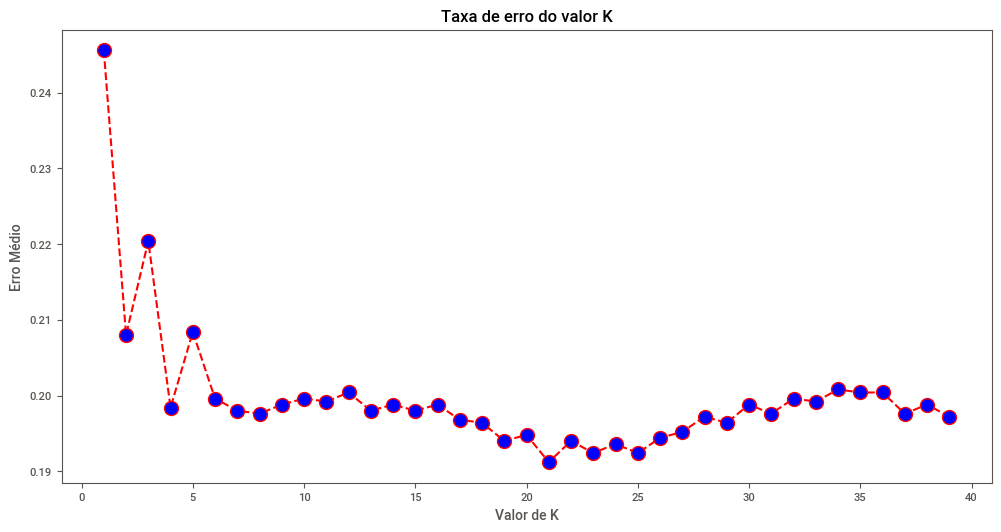

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), erro, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')
plt.show()

In [ ]:
# é possível observar que o K=21 possui o menor erro médio, sendo o essencial para o modelo. Reajustando:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train, y_train)
# matriz de confusão
print(pd.crosstab(y_test, result_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1839  143  1982
1         378  140   518
All      2217  283  2500


In [ ]:
# analisando o relatório de texto mostrando as principais métricas de classificação para o modelo random forest
print(classification_report(y_test, result_knn))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1982
           1       0.49      0.27      0.35       518

    accuracy                           0.79      2500
   macro avg       0.66      0.60      0.61      2500
weighted avg       0.76      0.79      0.77      2500



Apesar de aplicado o k com o menor erro vizualizado, tem-se uma grande quantidade de falsas previsões, tanto para falso positivo quanto para falso negativo. Apesar de ter uma boa quantidade de acertos em verdadeiros negativos, ou seja, o modelo teve uma boa previsão de clientes que não darão churn, mas um mal desempenho na previsão de clientes que terão evasão, enfatizando que o modelo não consegue prever bem o churn, que é o principal objetivo, prever os clientes cujo Exited seja 1.

In [ ]:
# modelo Random Forest

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)

y_rf = rf.predict(x_test)
print (pd.crosstab(y_test,y_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1879  103  1982
1         310  208   518
All      2189  311  2500


Apesar de uma melhor performance em comparação com modelo knn, tem-se ainda uma grande quantidade de falsos negativos, ou seja, que o modelo prever como negativo, mas que na verdade é positivo.

In [ ]:
# analisando o relatório de texto mostrando as principais métricas de classificação para o modelo random forest

print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1982
           1       0.67      0.40      0.50       518

    accuracy                           0.83      2500
   macro avg       0.76      0.67      0.70      2500
weighted avg       0.82      0.83      0.82      2500



Podemos ver que, para verdadeiros positivos obteve-se um recall considerado baixo, o que não soluciona ainda a problemática de churn, cujo foco é obter uma boa previsão de verdadeiros positivos.

In [ ]:
# Analisando a importância de cada variável para previsão do churn no modelo random forest

feature_importances = pd.DataFrame(rf.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

# Neste caso, a feature age tem maior influência sobre a target.

,importance
Age,0.284916
EstimatedSalary,0.189371
CreditScore,0.185483
IsActiveMember,0.044709
NumOfProducts,0.043034
HasCrCard,0.027687
Gender,0.026069
Geography_Germany,0.021689
Balance_Zerada,0.019592
Tenure_4-6,0.018999


In [ ]:
# modelo XGBoost

xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)
xgb.fit(x_train, y_train)

y_xgb = xgb.predict(x_test)
print (pd.crosstab(y_test,y_xgb, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1840  142  1982
1         293  225   518
All      2133  367  2500


In [ ]:
# analisando o relatório de texto mostrando as principais métricas de classificação para o modelo XGBoost
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1982
           1       0.61      0.43      0.51       518

    accuracy                           0.83      2500
   macro avg       0.74      0.68      0.70      2500
weighted avg       0.81      0.83      0.81      2500



* Apesar da acurácia não alterar no XGBoost, todas as medidas referentes a classe 1 foi melhor neste modelo. 
* A acurácia é uma medida geral do acerto do modelo, e o modelo XGBoost não conseguiu prever a classe 0 tão bem quanto o modelo Random Forest, por isso a acurácia foi menor, de 86% foi para 85%.
* Porém como o objetivo era prever o Churn, o modelo XGBoost teve uma melhor performance nesse quesito.

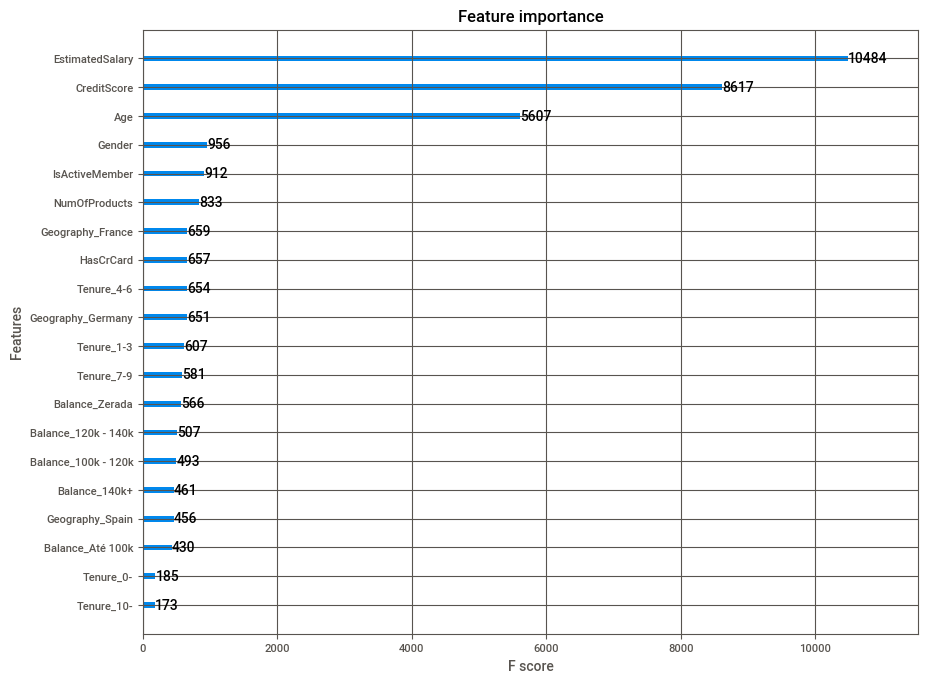

In [ ]:
# analisando as features mais importantes no modelo XGBoost

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax)

Métodos Ensemble

In [ ]:
# Para tentar melhorar a previsão do Churn, vamos combinar os dois melhores modelos, Random Forest e XGBoost.

voto = VotingClassifier(estimators=[('rf', rf),('xgb', xgb)], voting='soft')
voto = voto.fit(x_train,y_train)  # treinando modelo

y_voting = voto.predict(x_test)  # prevendo y
print (pd.crosstab(y_test,y_voting, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1864  118  1982
1         300  218   518
All      2164  336  2500


In [ ]:
# analisando o relatório de texto mostrando as principais métricas de classificação para a combinação dos modelos
print(classification_report(y_test, y_voting))
# Ao combinar os modelos observa-se uma melhora nas medidas de validação, assim considera-se os modelos combinados como o melhor modelo.

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1982
           1       0.65      0.42      0.51       518

    accuracy                           0.83      2500
   macro avg       0.76      0.68      0.70      2500
weighted avg       0.82      0.83      0.82      2500



### Probabilidade do Churn

In [ ]:
dados['proba'] = xgb.predict_proba(x_finish[x_train.columns])[:,1]
dados[['CustomerId','proba']]

,CustomerId,proba
0,15634602,0.856474
1,15647311,0.481023
2,15619304,0.003041
3,15701354,0.014753
4,15737888,0.000322
...,...,...
9995,15606229,0.000859
9996,15569892,0.001161
9997,15584532,0.764452
9998,15682355,0.685461


Agora tem-se a probabilidade do cliente dar Churn e pode-se criar ações com base nisso.
O modelo XGBost e Random Forest se mostraram eficiente para prever a probabilidade do Churn dos clientes. As variáveis mais importante para prever o Churn foram a idade do cliente, o saldo bancário e o número de produtos, ou seja, quanto maior o produto maior o risco de Chun.

O modelo final, foi a combinação dos modelos XGBoost e Random Forest. Com modelo de Churn podemos prever clientes com a maior chance de cancelar o serviço e assim tomar medidas preventivas, afim de evitar essa saída.

In [ ]:
# dos exemplos classificados como positivos, quantos realmente são positivos?
# precisão = a cada 100 clientes classificados como 1, é esperado que em torno de 68 sejam realmente 1.
# de todos os exemplos que são positivos, quantos foram classificados corretamente como positivos?
# sensibilidade = a cada 100 clientes que são de fato 1, é esperado que apenas 37 seja corretamente identificado como 1.
# um modelo que apresenta um bom F1score é capaz tanto de acertar suas predições(prec. alta) quanto de recuperar os exemplos da classe de interesse(sens.alta).

<hr>

Quando a variavel resposta está desbalanceada, 80% e 20% por exemplo, é comum utilizar o StratifiedKFOLD ou RepeatedStratifiedKFOLD. Ele faz as folds, respeitando a proporção da variável resposta, para evitar que pegue pouco da variável resposta e não consiga prever corretamente.

### RepeatedStratifiedKFOLD

## **Tunagem de Hiperparâmetros**
Tunagem de Hiperparâmetros nada mais é do que encontrar qual a melhor combinação de valores que passamos aos algoritmos no momento de seu treinamento. Algums modelos tem poucos hiperparâmetros que se deseja tunar, outros têm muitos.

Para fazer essa checagem, testa-se através de um método de validação selecionado, o desempenho de cada possível combinação de hiperparâmetros apresentado. Logo se vê que se necessita de bastante poder computacional para realizar tal checagem.

Na função abaixo, temos um programa que realiza a busca pelos hiperparâmetros. Veja que ela utiliza dois tipos de hipertunagem de parâmetros, o tipo = 'tudo', que testa todo espaço de parâmetros apresentado (custoso, lento, preciso), e o tipo = 'aleatorio', que testa apenas uma amostra aleatória do espaço de parâmetros (menos custoso, rápido, menos preciso).

Nesse exemplo, estamos procurando qual é o melhor K para o KNN. Varremos todas as possibilidades de 1 até 49, de 2 em 2, o que totaliza 25 modelos diferentes para se testar. E em cada modelo, é aplicada a estratégia de validação corresponde, muitas vezes envolvendo várias iterações do K-Fold.

Devemos escolher entre as duas estratégias levando em consideração o recurso computacional que temos em mão e o tempo que podemos dispor para encontrar a solução.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# configuração de validação cruzada GridSerchCV (maior custo computacional, mais preciso)
  
validacao = RepeatedStratifiedKFold(n_splits = 10,  n_repeats = 5)  # recomenda-se usar essa técnica quando a variável resposta é desbalanceada
                                                                    # pois respeita a proporção entre as classes da target
knn = KNeighborsClassifier()
parameters = {'n_neighbors' : np.arange(1, 50, 2)}
grid = GridSearchCV(knn,
                    param_grid=parameters,
                    scoring='recall',
                    cv=validacao,
                    verbose=1,
                    n_jobs=-1)

grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

Fitting 50 folds for each of 25 candidates, totalling 1250 fits
0.34285726734053673
{'n_neighbors': 1}


In [ ]:
rf = RandomForestClassifier()
parameters = params = {'n_estimators':np.arange(1, 50, 2), 'max_depth':range(1, 50) }
random = RandomizedSearchCV(rf,
                    param_distributions=parameters,
                    scoring='recall',
                    cv=validacao,
                    verbose=1,
                    n_jobs=-1,
                    n_iter=100)

random.fit(x_train, y_train)

print(random.best_score_)
print(random.best_params_)

Fitting 50 folds for each of 100 candidates, totalling 5000 fits
0.4121253049843152
{'n_estimators': 1, 'max_depth': 40}


In [ ]:
xgb = XGBClassifier(learning_rate =0.1, 
 min_child_weight=1,
 gamma=0,
  objective= 'binary:logistic',
 scale_pos_weight=1.0,
 )

parameters = {'n_estimators':range(1,1000),
              'max_depth': range(1,50),
              'subsample': range(0.5,1),
              'seed': range(1,50),
              'nthread': range(1,50),
              'colsample_bytree': range(0.5,1)
               }